# Liver patient prediction

## 1) Business case

Liver is the largest organ inside our body. It helps our body digest food, store energy and remove poisons.  Malfunctioning of liver will affect the aforesaid activities resulting in liver disease among the people.

Malfunctioning of liver could occur due to the infection by viruses, excessive consumption of alcohol, inhale of harmful gases, cosumption of stale/contaminated food, pickles or due to inherited diseases.

Patients with liver disease have been continuously increasing and identification of such patients via machine learning(by evaluating few vital parameters) is possible which will reduce the burden on doctors.

## 2) Input dataset and Domain analysis

### 2.1 Domain analysis - Analysis of the dataset's features

A dataset comprising of few vital parameters(given below) has been given to train and predict if an individual is a liver patient or not.

1) Age                        - refers to the age of the patients
2) Gender                     - refers to the gender of the patients
3) Total_Bilirubin            - refers to the level of total bilirubin in the blood.  Normal range is 0.2 to 1.2 mg/dL.    
                                Anything above 1.2 mg/dL is usually considered elevated.  A total bilirubin level > 17.5 mg/dL 
                                is a criterion for predicting death and the need for liver transplantation.
4) Direct_Bilirubin           - refers to the level of direct bilirubin in the blood.  Normal range is less than 0.3 mg/dL.
5) Alkaline_Phosphotase       - refers to the level of alkaline phosphotase in the blood.  Normal range is 44 to 147 IU/L.
6) Alanine_Aminotransferase   - refers to the level of alanine aminotransferase in the blood.  Normal range is 7 to 55 IU/L.
7) Aspartate_Aminotransferase - refers to the level of aspartate aminotransferase in the blood.  Normal range for
                                male is 6-34 IU/L and for female is 8-40 IU/L.
8) Total_Proteins             - refers to the level of total proteins in the blood.  Normal range is 60 to 80 g/L.
9) Albumin                    - refers to the level of albumin in the blood.  Normal albumin range is 3.5 to 5.5 g/dL.
10) Albumin_Globulin_Ratio    - refers to the value of albumin-globulin ratio.  Normal range is 1.1–2.5.
11) Target                    - refers to the presence of the liver disease.  '1' refers to patient with liver disease and '2'                                 refers to patient without liver disease.

### 2.2 Import the required libraries

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

##### 2.2 Libraries and their functionalities
1) Numpy                  - for statistical calculations like mean, median etc.,
2) Pandas                 - for dataset processing
3) Matplotlib and Seaborn - for data visualization
4) Warnings               - to filter warning messages

### 2.3 Import the dataset

In [123]:
liver_data = pd.read_csv("Indian Liver Patient Dataset.csv", header=None)

liver_data.columns = ["Age", "Gender", "Total_Bilirubin", "Direct_Bilirubin", "Alkaline_Phosphotase",
                      "Alanine_Aminotransferase", "Aspartate_Aminotransferase", "Total_Protiens",
                      "Albumin", "Albumin_Globulin_Ratio", "Target"]

##### 2.3 Inference
1) Input dataset does not have an header column.  Hence, inserted header column with appropriate feature names

### 2.4 View sample data

In [125]:
liver_data

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65  Female              0.7               0.1                   187   
1     62    Male             10.9               5.5                   699   
2     62    Male              7.3               4.1                   490   
3     58    Male              1.0               0.4                   182   
4     72    Male              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
578   60    Male              0.5               0.1                   500   
579   40    Male              0.6               0.1                    98   
580   52    Male              0.8               0.2                   245   
581   31    Male              1.3               0.5                   184   
582   38    Male              1.0               0.3                   216   

     Alanine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                          16                          18             6.8   
1                          64                         100             7.5   
2                          60                          68             7.0   
3                          14                          20             6.8   
4                          27                          59             7.3   
..                        ...                         ...             ...   
578                        20                          34             5.9   
579                        35                          31             6.0   
580                        48                          49             6.4   
581                        29                          32             6.8   
582                        21                          24             7.3   

     Albumin  Albumin_Globulin_Ratio  Target  
0        3.3                    0.90       1  
1        3.2                    0.74       1  
2        3.3                    0.89       1  
3        3.4                    1.00       1  
4        2.4                    0.40       1  
..       ...                     ...     ...  
578      1.6                    0.37       2  
579      3.2                    1.10       1  
580      3.2                    1.00       1  
581      3.4                    1.00       1  
582      4.4                    1.50       2  

[583 rows x 11 columns]

##### 2.4 Inference
1) Input dataset has 583 rows of data
2) We have 11 features as mentioned in the domain analysis(section 2.1) of which feature "Gender" alone is categorical;
   remaining are numerical

## 3) Exploratory Data Analysis

### 3.1 Describe the dataset and it's features

#### 3.1.1 Key parameters of numerical features

In [128]:
liver_data.describe()

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  583.000000       583.000000        583.000000            583.000000   
mean    44.746141         3.298799          1.486106            290.576329   
std     16.189833         6.209522          2.808498            242.937989   
min      4.000000         0.400000          0.100000             63.000000   
25%     33.000000         0.800000          0.200000            175.500000   
50%     45.000000         1.000000          0.300000            208.000000   
75%     58.000000         2.600000          1.300000            298.000000   
max     90.000000        75.000000         19.700000           2110.000000   

       Alanine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
count                583.000000                  583.000000      583.000000   
mean                  80.713551                  109.910806        6.483190   
std                  182.620356                  288.918529        1.085451   
min                   10.000000                   10.000000        2.700000   
25%                   23.000000                   25.000000        5.800000   
50%                   35.000000                   42.000000        6.600000   
75%                   60.500000                   87.000000        7.200000   
max                 2000.000000                 4929.000000        9.600000   

          Albumin  Albumin_Globulin_Ratio      Target  
count  583.000000              579.000000  583.000000  
mean     3.141852                0.947064    1.286449  
std      0.795519                0.319592    0.452490  
min      0.900000                0.300000    1.000000  
25%      2.600000                0.700000    1.000000  
50%      3.100000                0.930000    1.000000  
75%      3.800000                1.100000    2.000000  
max      5.500000                2.800000    2.000000

##### 3.1.1 Inference
1) None of the features have zero values
2) We have 4 null values for the feature Albumin_Globulin_Ratio
3) The values are in different scale.  Hence, scaling the values before training the model is essential

#### 3.1.2 Key parameters of categorical features

In [129]:
liver_data.describe(include='O')

Gender
count     583
unique      2
top      Male
freq      441

##### 3.1.2 Inference
1) We have more data for male patients(76%) than the female patients(24%)

#### 3.1.3 Check the distribution of "Target" feature

In [130]:
liver_data["Target"].value_counts()

1    416
2    167
Name: Target, dtype: int64

##### 3.1.3 Inference
1) With respect to the "Target" feature, the data is unevenly distributed
2) We have 2 classes in the "Target" feature - class 1 and class 2
3) We have more data for patients with liver disease(Class 1 - 71%) than the patients without liver disease(Class 2 - 29%).  Hence, we need to balance the dataset via SMOTE before training the model

#### 3.1.4 Check for duplicate values

In [134]:
print(liver_data.duplicated().sum())
liver_data[liver_data.duplicated()]

13


Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
19    40  Female              0.9               0.3                   293   
26    34    Male              4.1               2.0                   289   
34    38  Female              2.6               1.2                   410   
55    42    Male              8.9               4.5                   272   
62    58    Male              1.0               0.5                   158   
106   36    Male              5.3               2.3                   145   
108   36    Male              0.8               0.2                   158   
138   18    Male              0.8               0.2                   282   
143   30    Male              1.6               0.4                   332   
158   72    Male              0.7               0.1                   196   
164   39    Male              1.9               0.9                   180   
174   31    Male              0.6               0.1                   175   
201   49    Male              0.6               0.1                   218   

     Alanine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
19                        232                         245             6.8   
26                        875                         731             5.0   
34                         59                          57             5.6   
55                         31                          61             5.8   
62                         37                          43             7.2   
106                        32                          92             5.1   
108                        29                          39             6.0   
138                        72                         140             5.5   
143                        84                         139             5.6   
158                        20                          35             5.8   
164                        42                          62             7.4   
174                        48                          34             6.0   
201                        50                          53             5.0   

     Albumin  Albumin_Globulin_Ratio  Target  
19       3.1                    0.80       1  
26       2.7                    1.10       1  
34       3.0                    0.80       2  
55       2.0                    0.50       1  
62       3.6                    1.00       1  
106      2.6                    1.00       2  
108      2.2                    0.50       2  
138      2.5                    0.80       1  
143      2.7                    0.90       1  
158      2.0                    0.50       1  
164      4.3                    1.38       1  
174      3.7                    1.60       1  
201      2.4                    0.90       1

##### 3.1.4 Inference
1) There are 13 duplicate rows and they need to be removed in data pre-processing

### 3.2 Data visualization and analysis

#### 3.2.1 Univariate analysis

##### 3.2.1.1 Analysis via Sweetviz library

In [135]:
# Import sweetviz library
import sweetviz as sv

In [136]:
liver_data_univar_rpt = sv.analyze(liver_data)

                                             |                                             | [  0%]   00:01 ->…


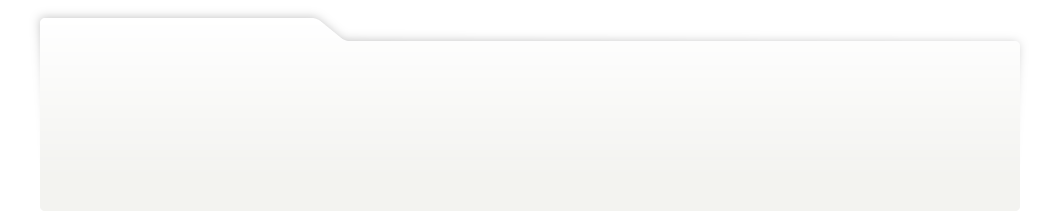
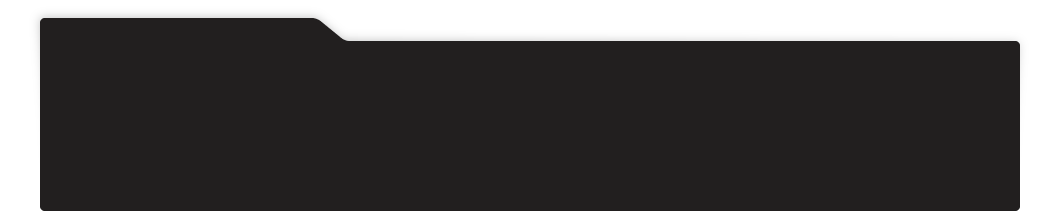
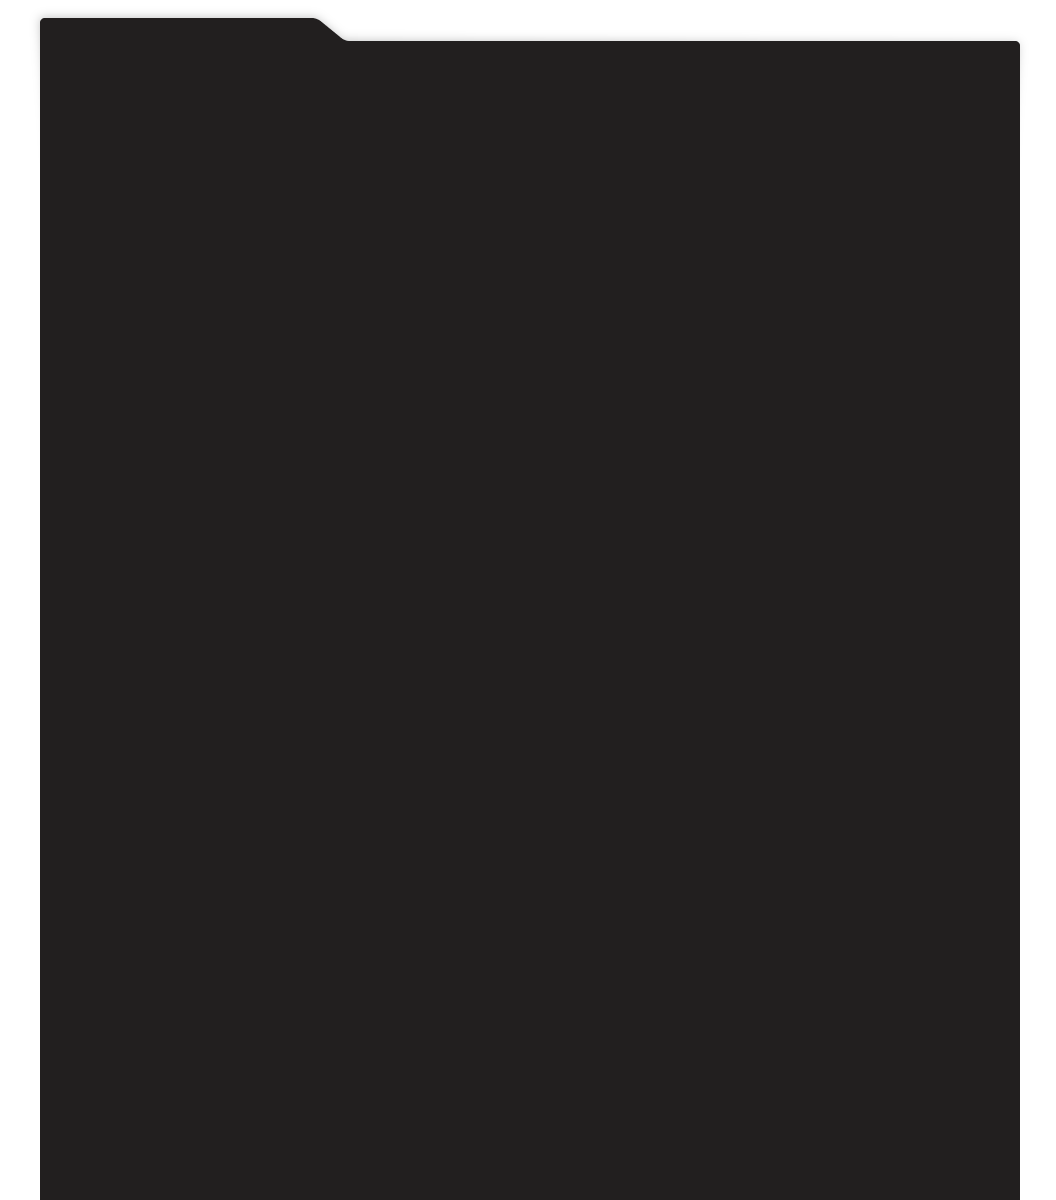
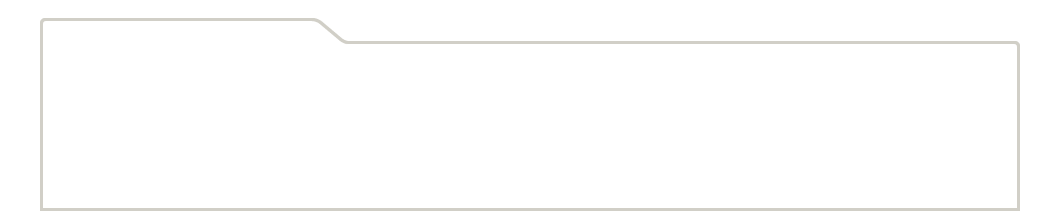
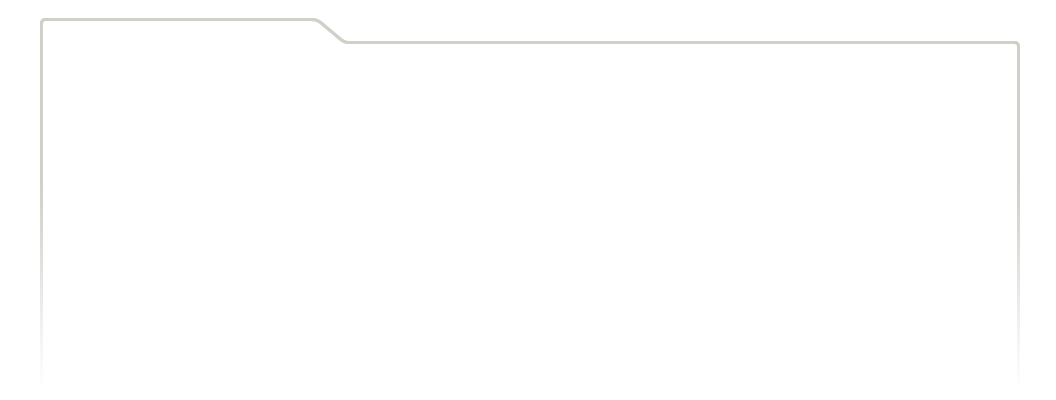
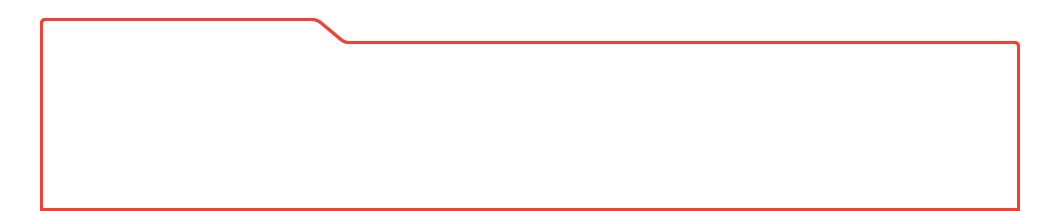
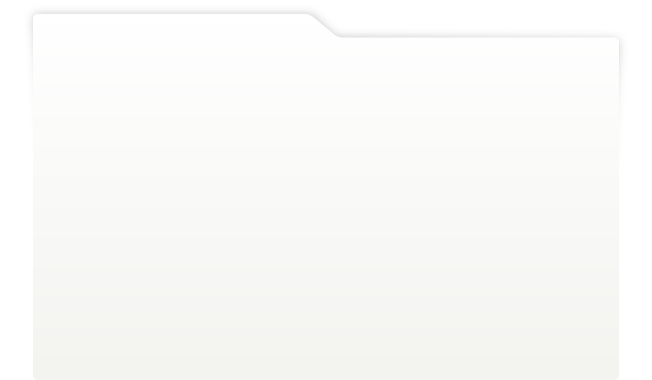
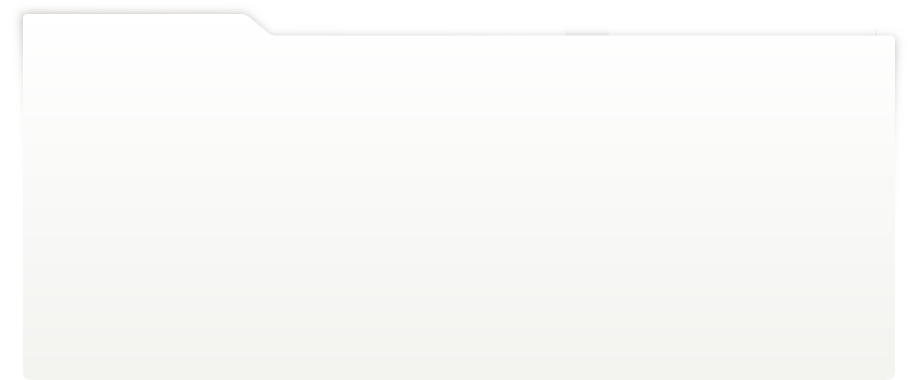
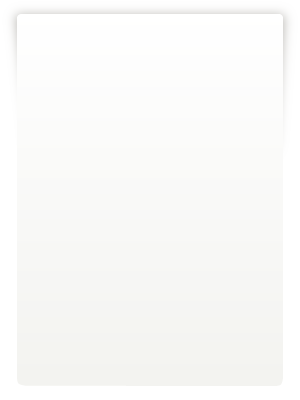
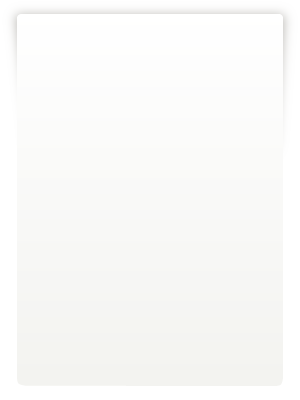
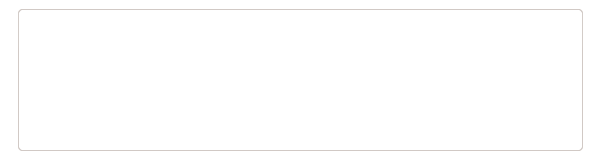
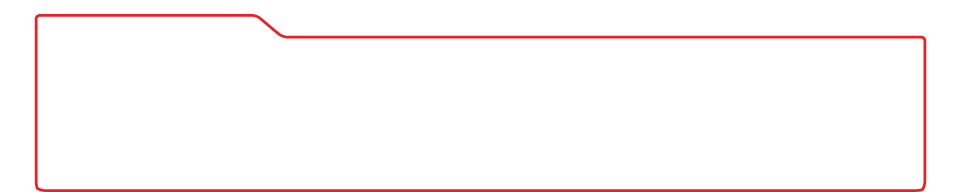
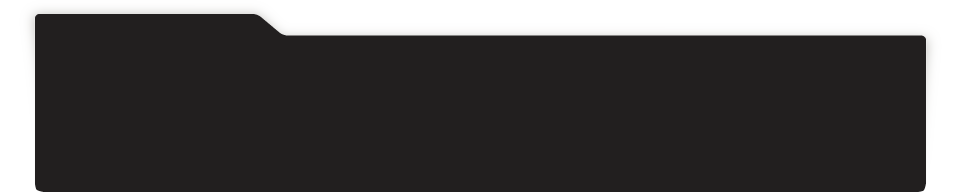
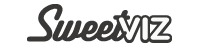
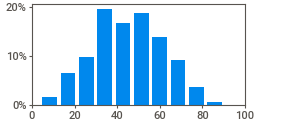
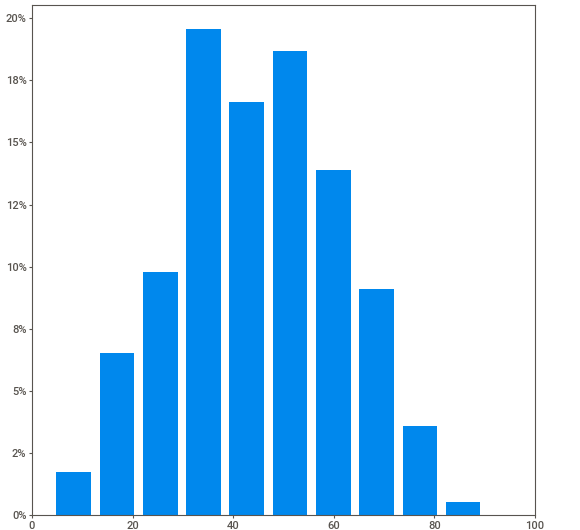
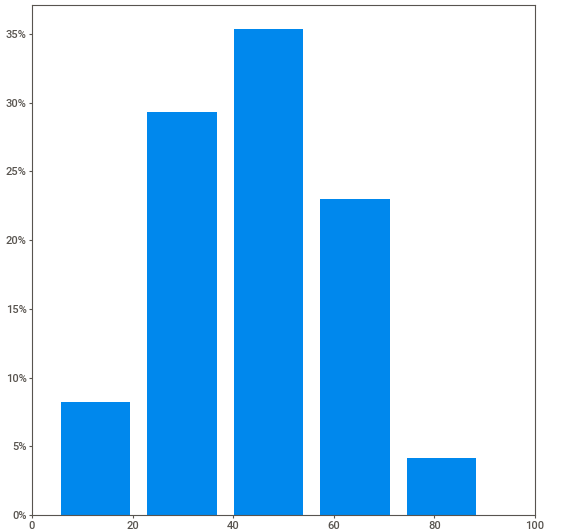
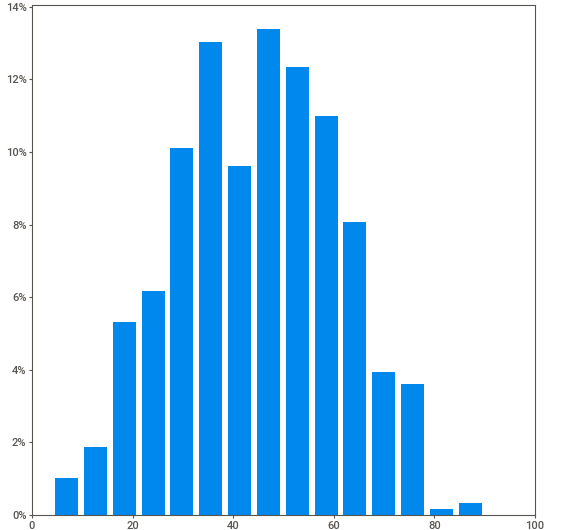
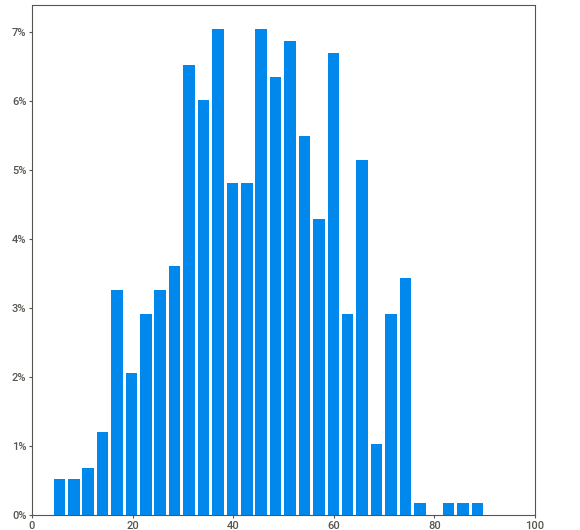
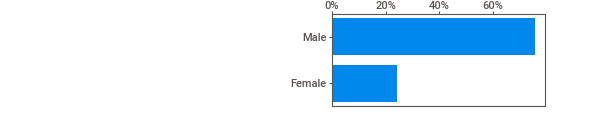
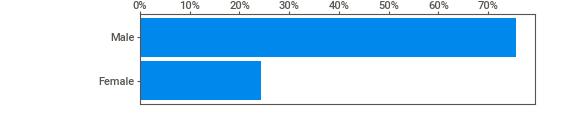
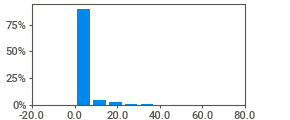
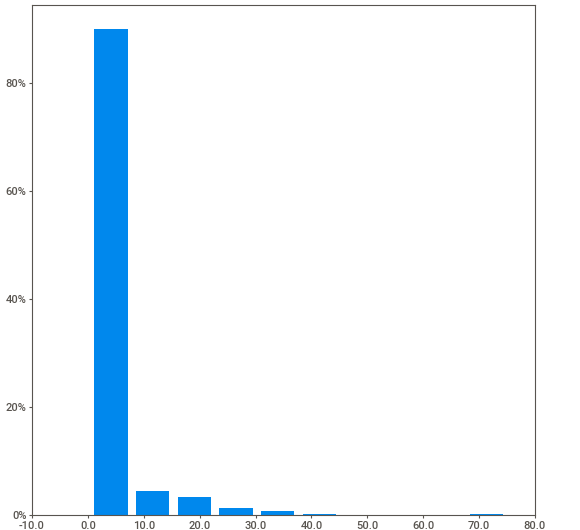
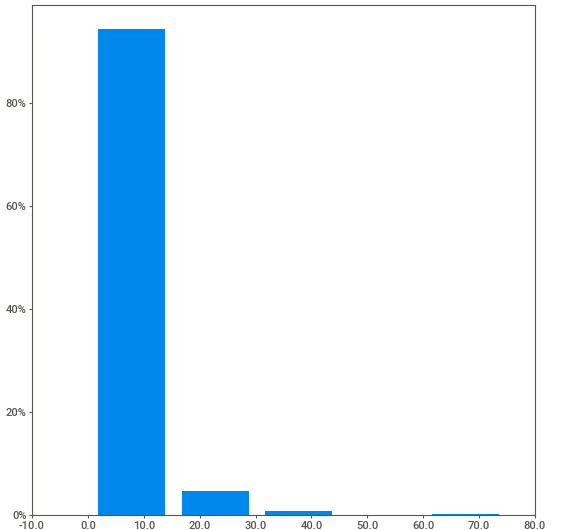
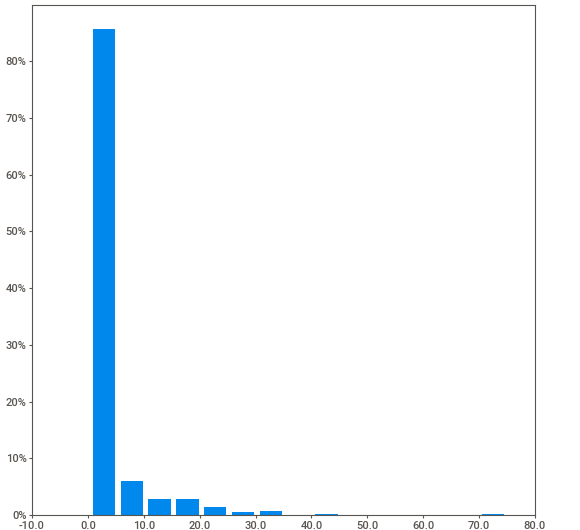
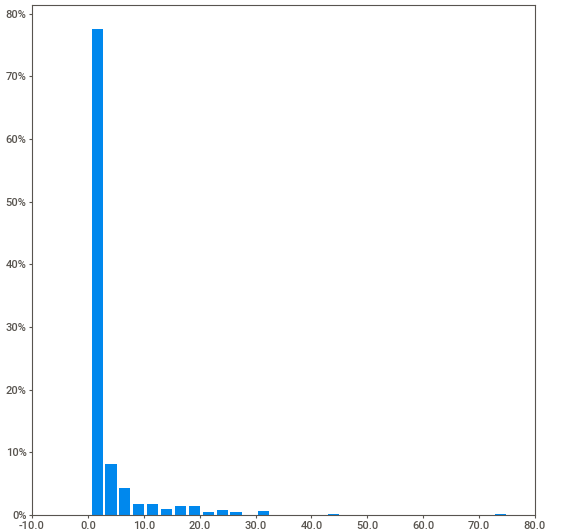
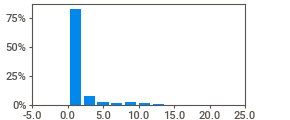
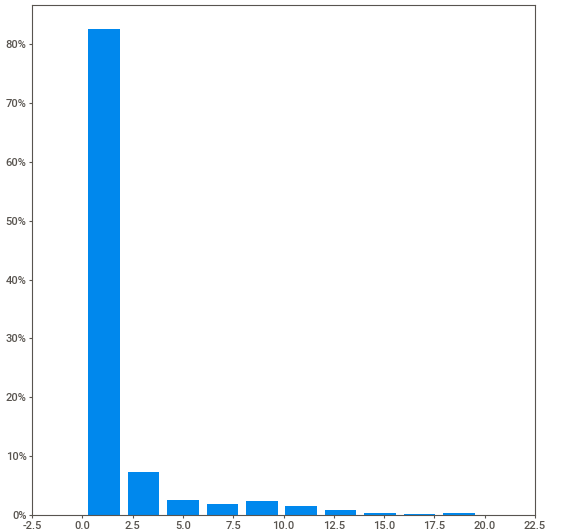
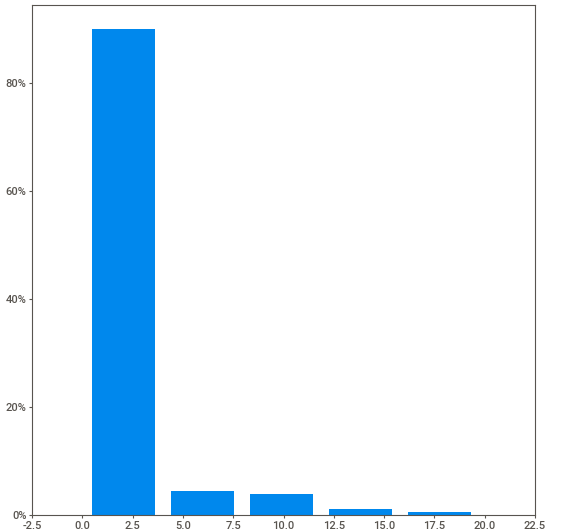
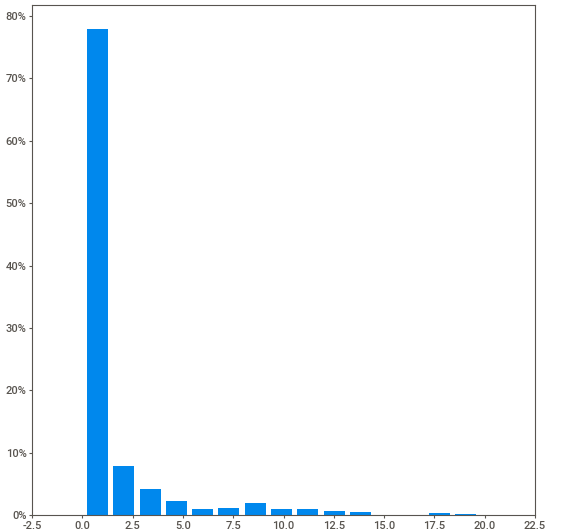
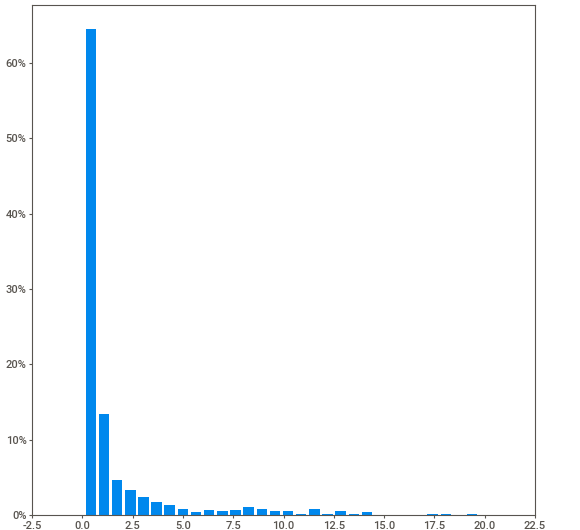
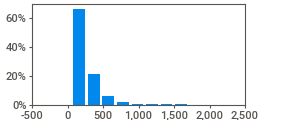
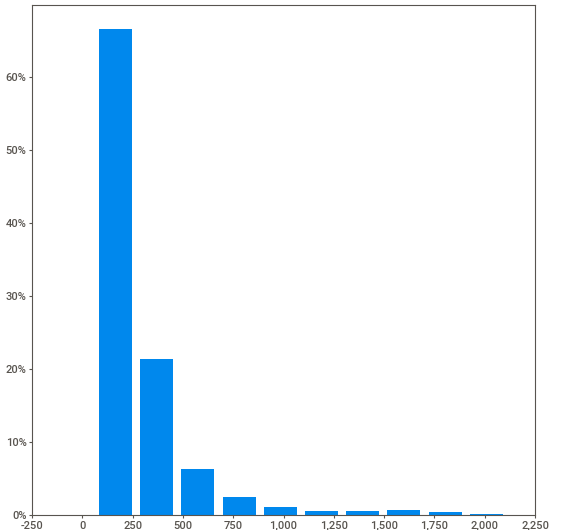
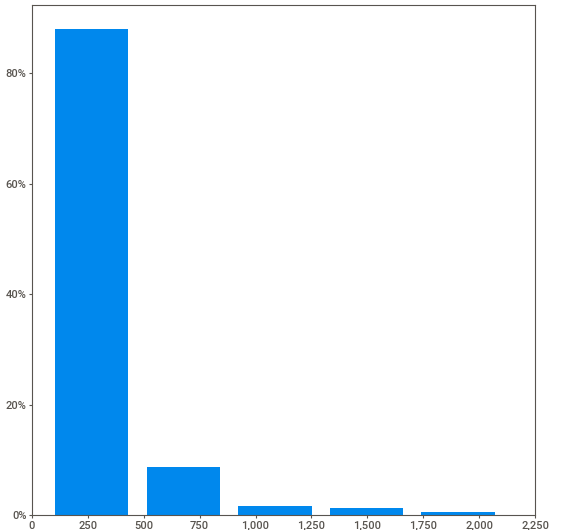
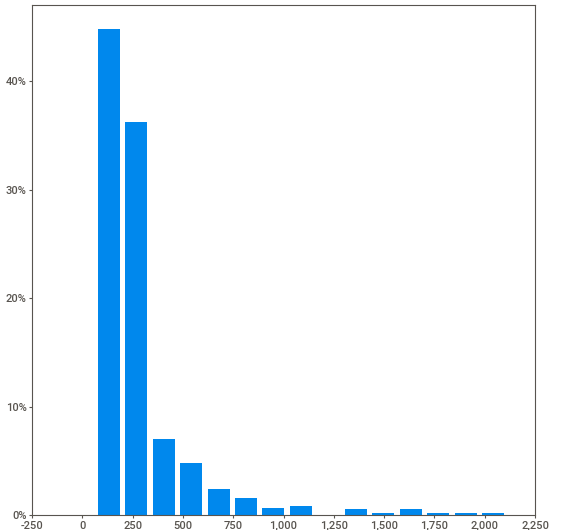
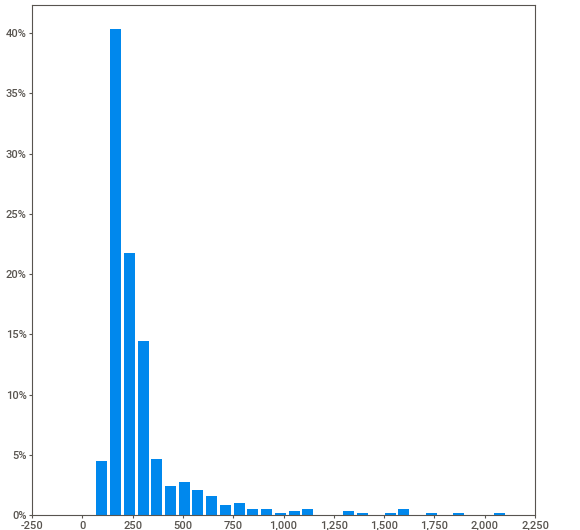
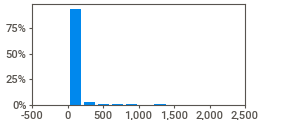
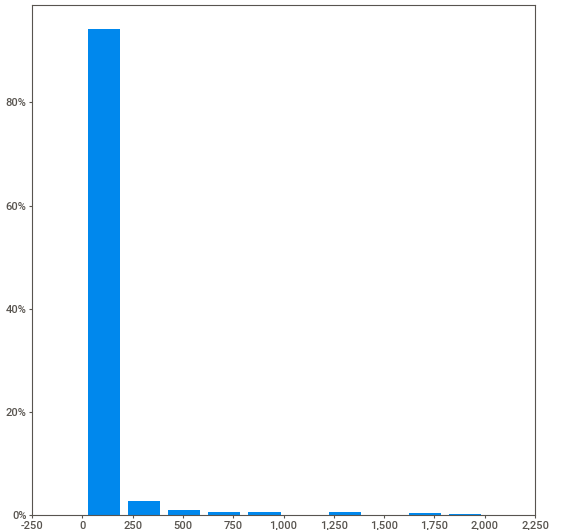
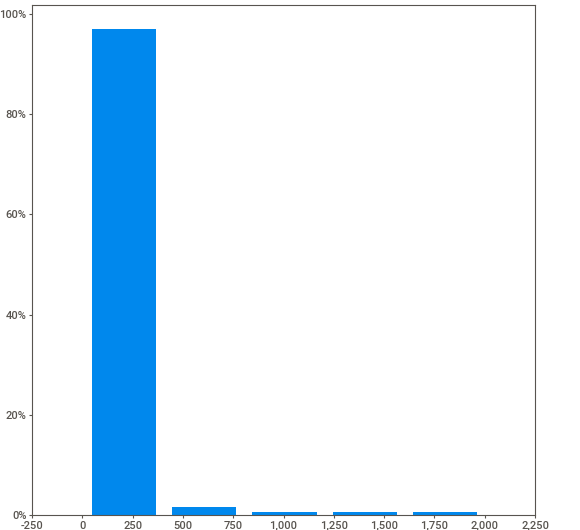
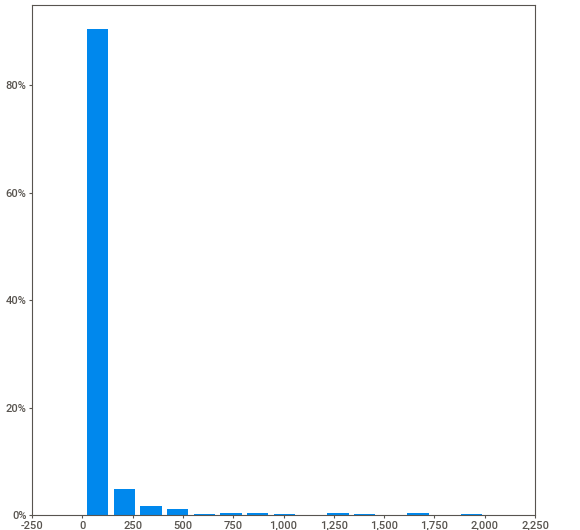
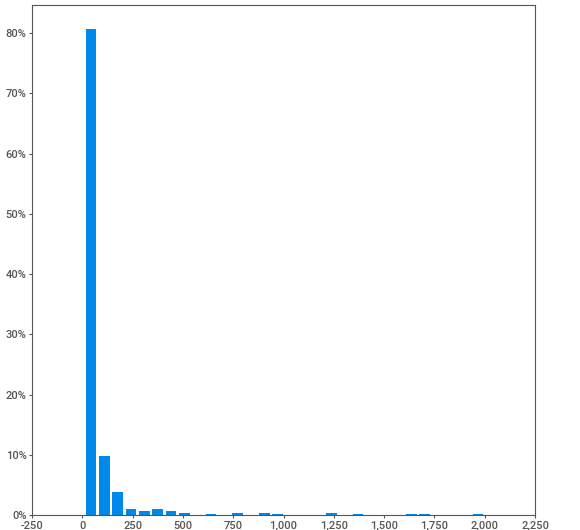
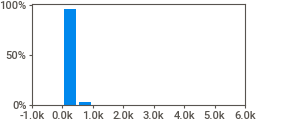
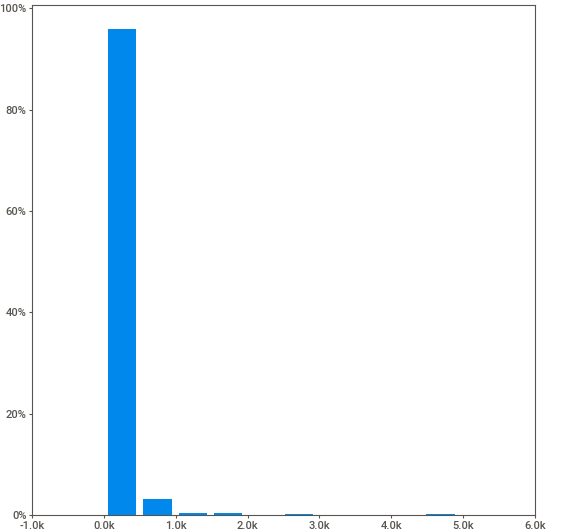
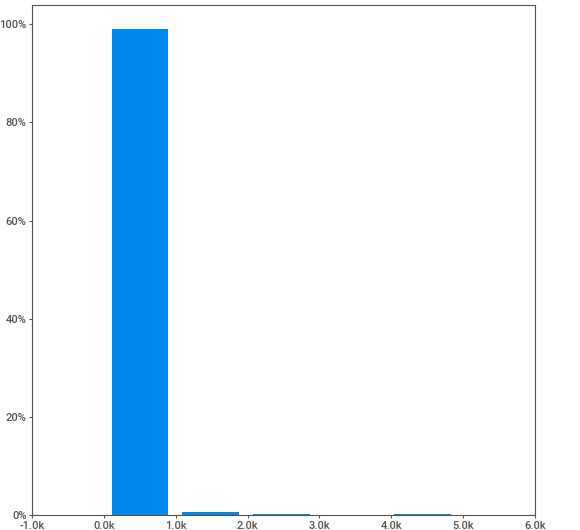
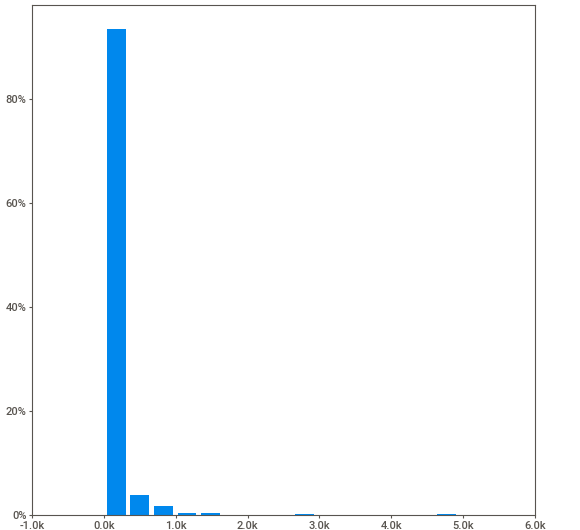
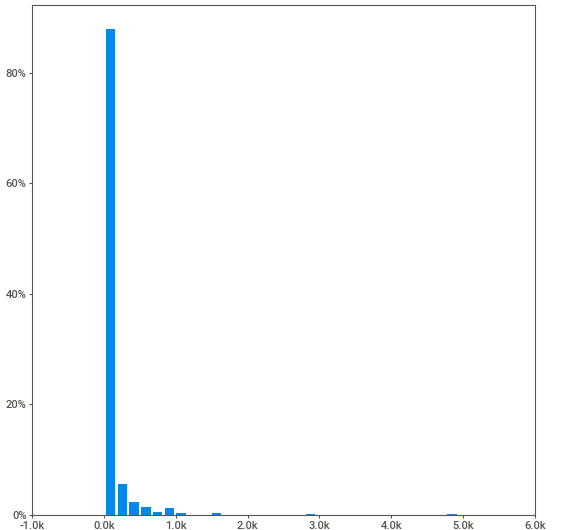
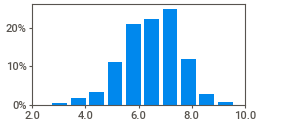
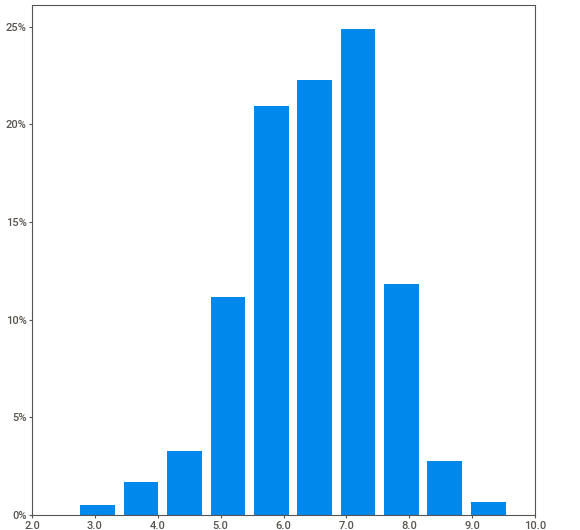
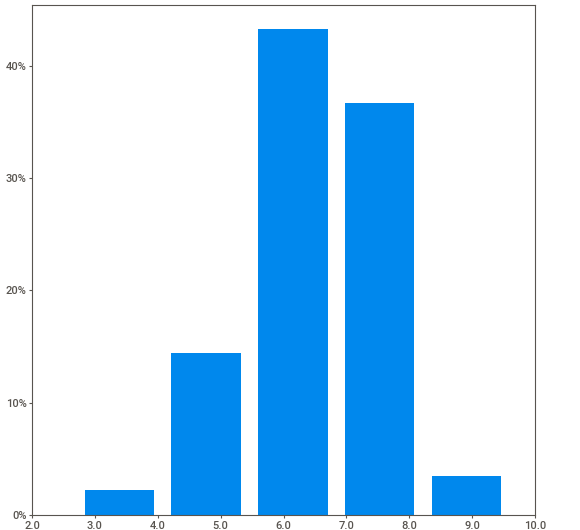
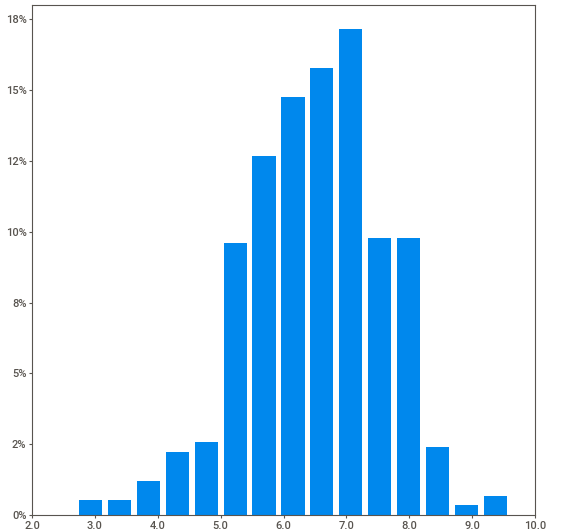
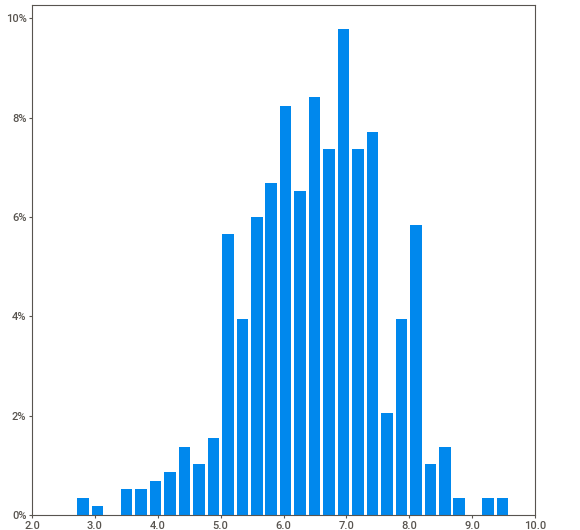
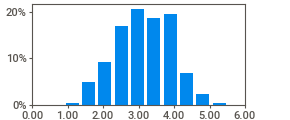
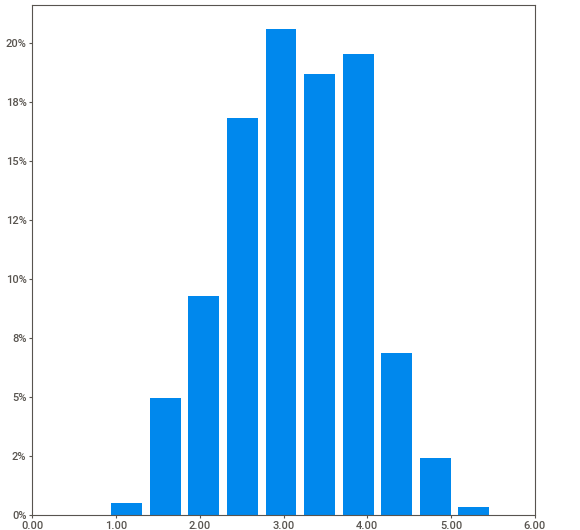
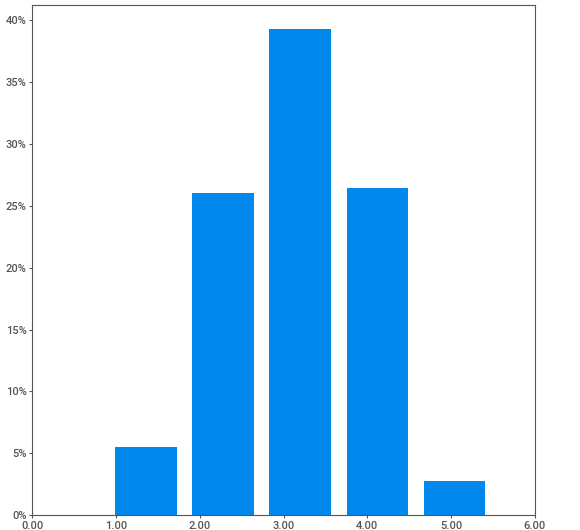
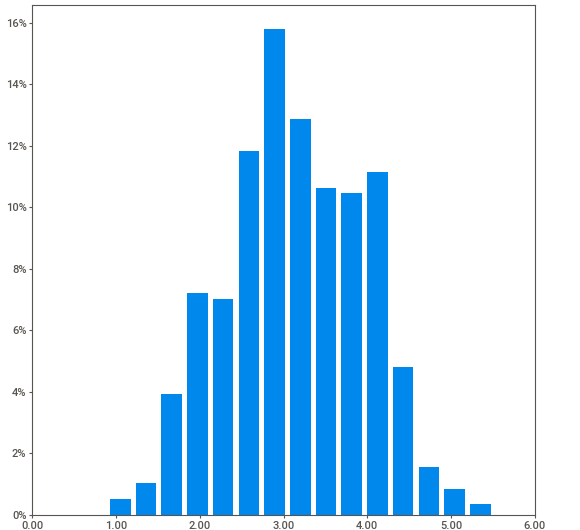
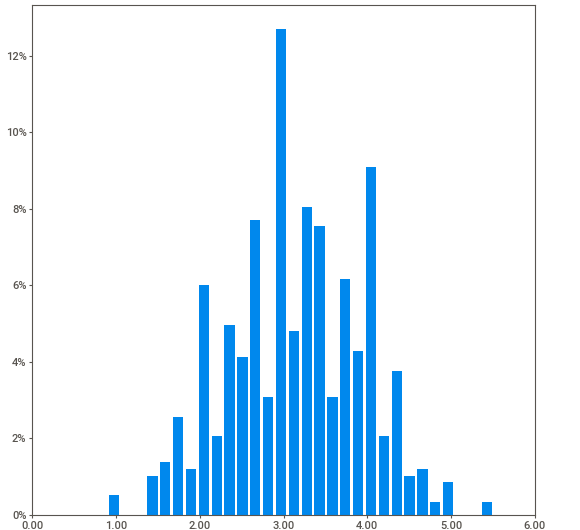
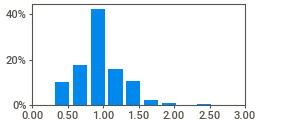
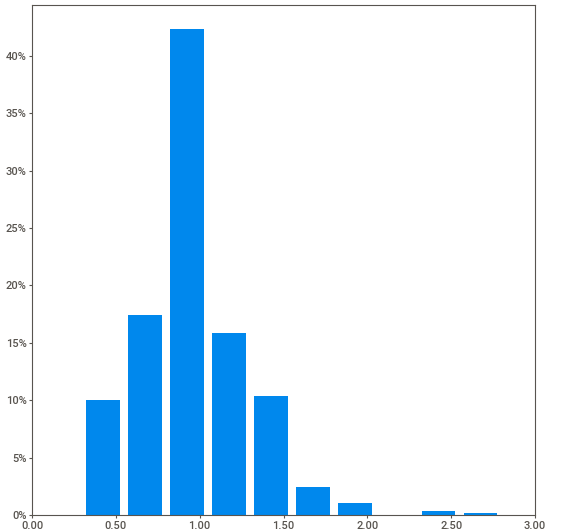
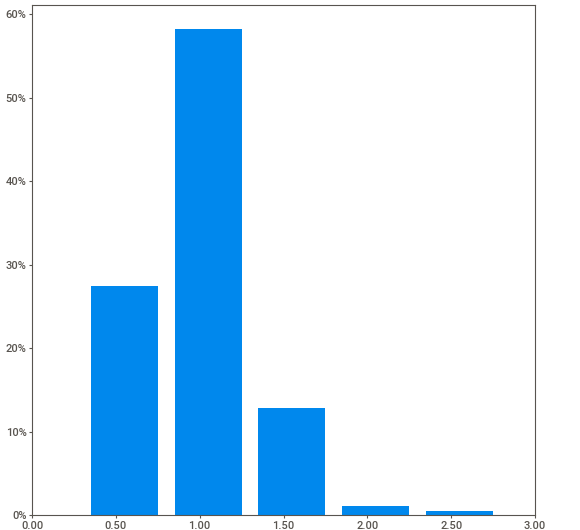
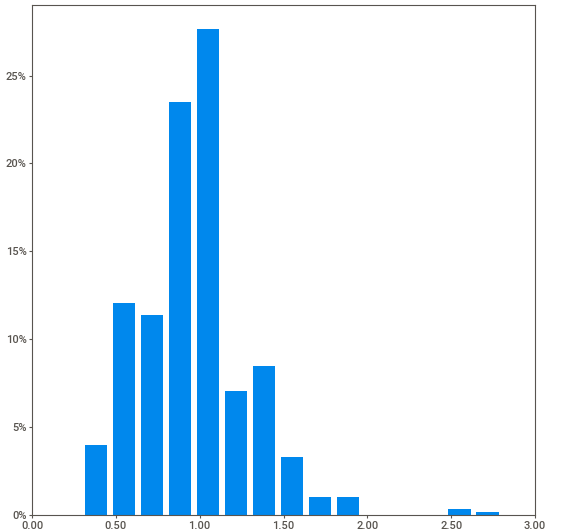
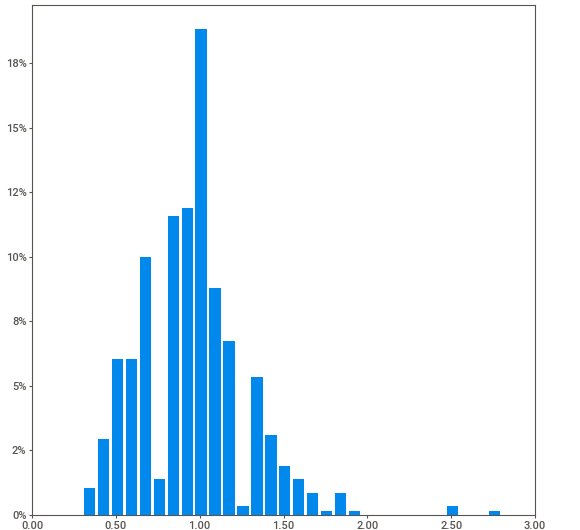
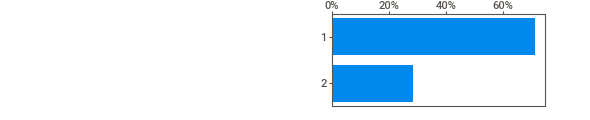
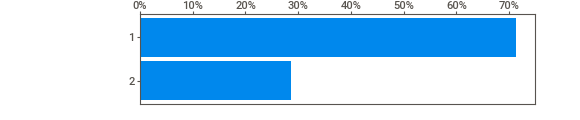
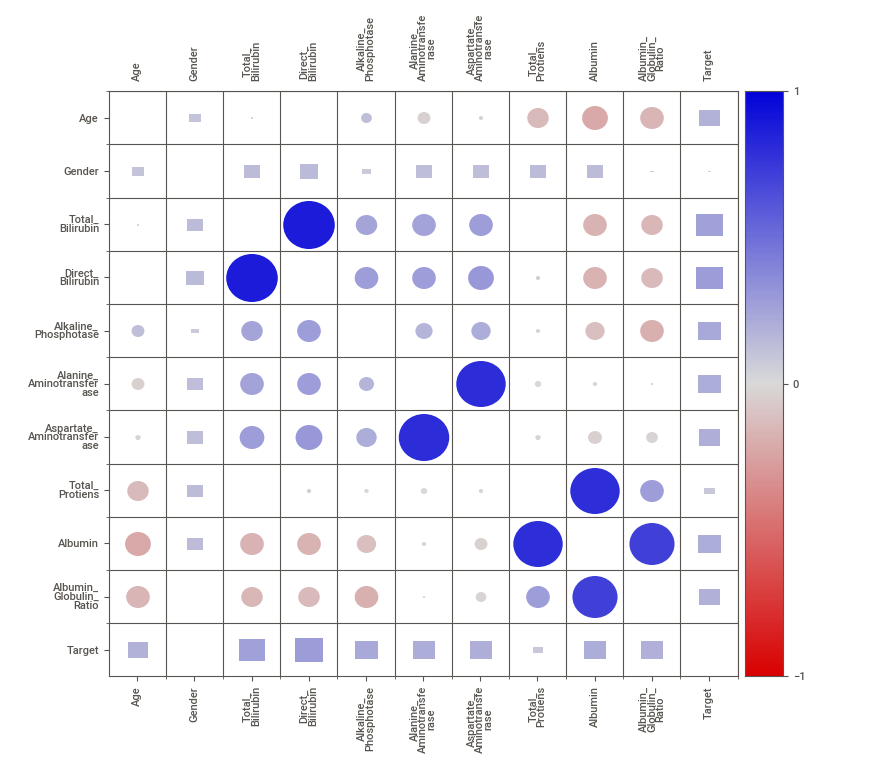
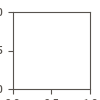

In [137]:
liver_data_univar_rpt.show_notebook()

##### 2.2.1 Inference
1) The dataset is small with 583 rows and is unevenly distributed with respect to the "Target" feature
2) Except the categorical feature "Gender" and the "Target" feature, other features follow normal distribution, but are skewed
3) We have more data for patients with liver disease(Class 1 - 71%) than the patients without liver disease(Class 2 - 29%). 
   Hence, we need to balance the dataset via SMOTE before training the model
4) We have 4 null values for the feature Albumin_Globulin_Ratio and this needs to be corrected
5) We could see a outliers for many features; this could be analysed further via Boxplot(in the section 3.2.1.2)

##### 3.2.1.2 Analysis via Boxplot

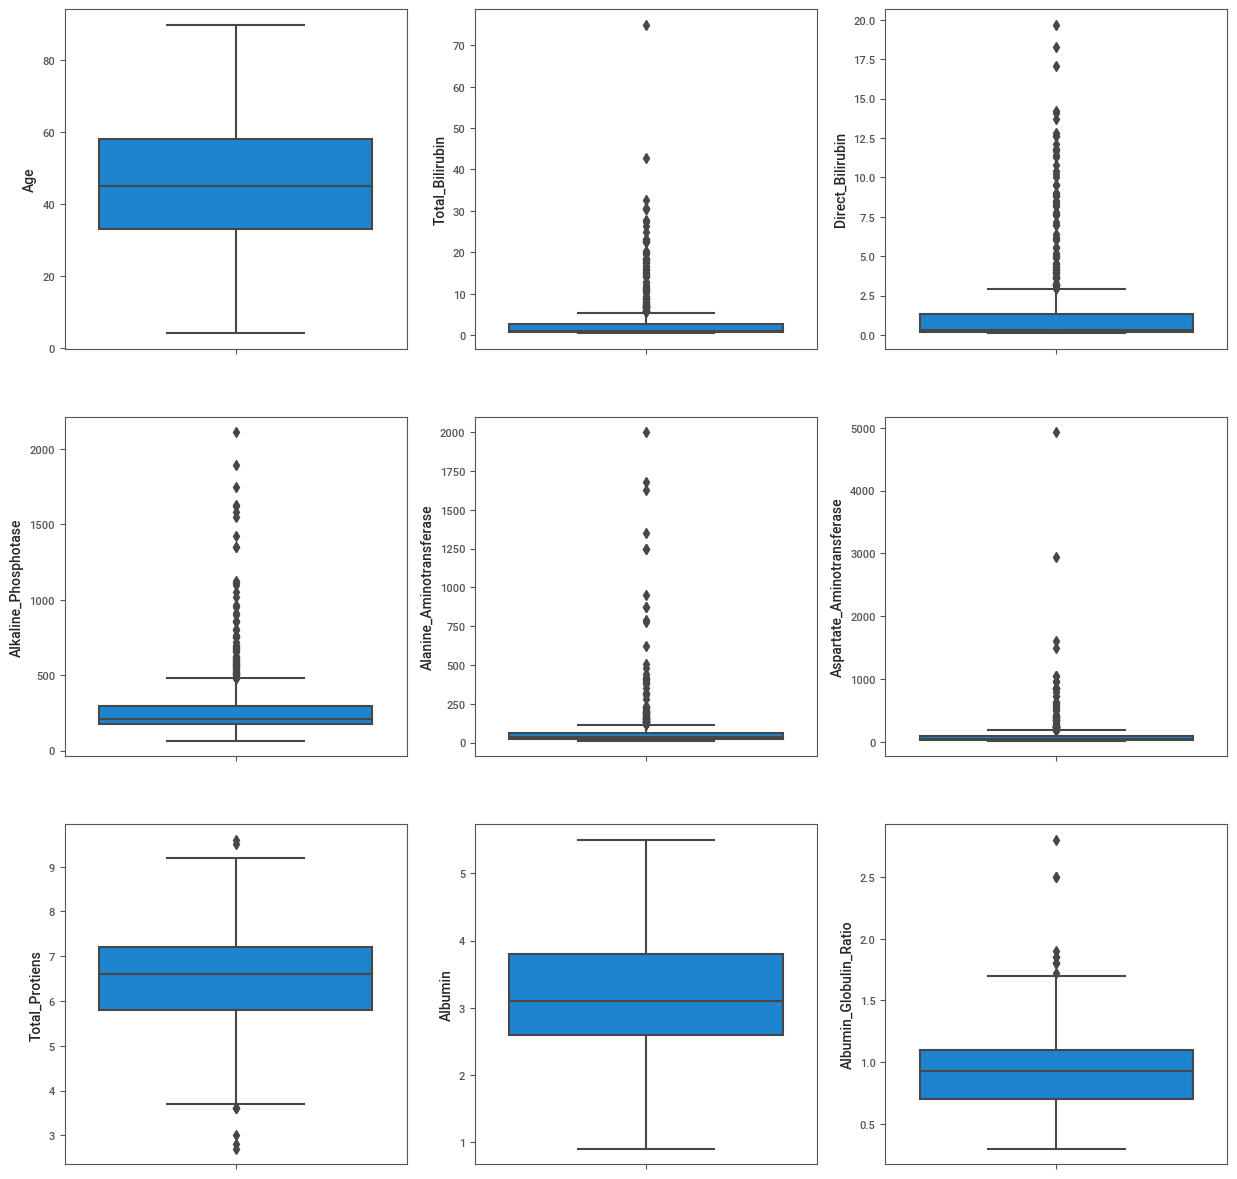

In [139]:
plt.figure(figsize=(15,15))
plt_num = 1

# Separate the numerical features alone(Exclude features Gender and Target)
liver_data_num = liver_data.columns
liver_data_num = liver_data_num.drop(["Gender", "Target"])

for column in liver_data_num:
    if plt_num <= 9:
        plt.subplot(3,3,plt_num)
        sns.boxplot(y=liver_data[column])
    plt_num+=1
plt.show()                                                             

##### 3.2.1.2 Inference
1) There are too many outliers in all features except Age and Albumin
2) Since this is medical data we need not correct any of those outlier values

#### 3.2.2 Bivariate analysis

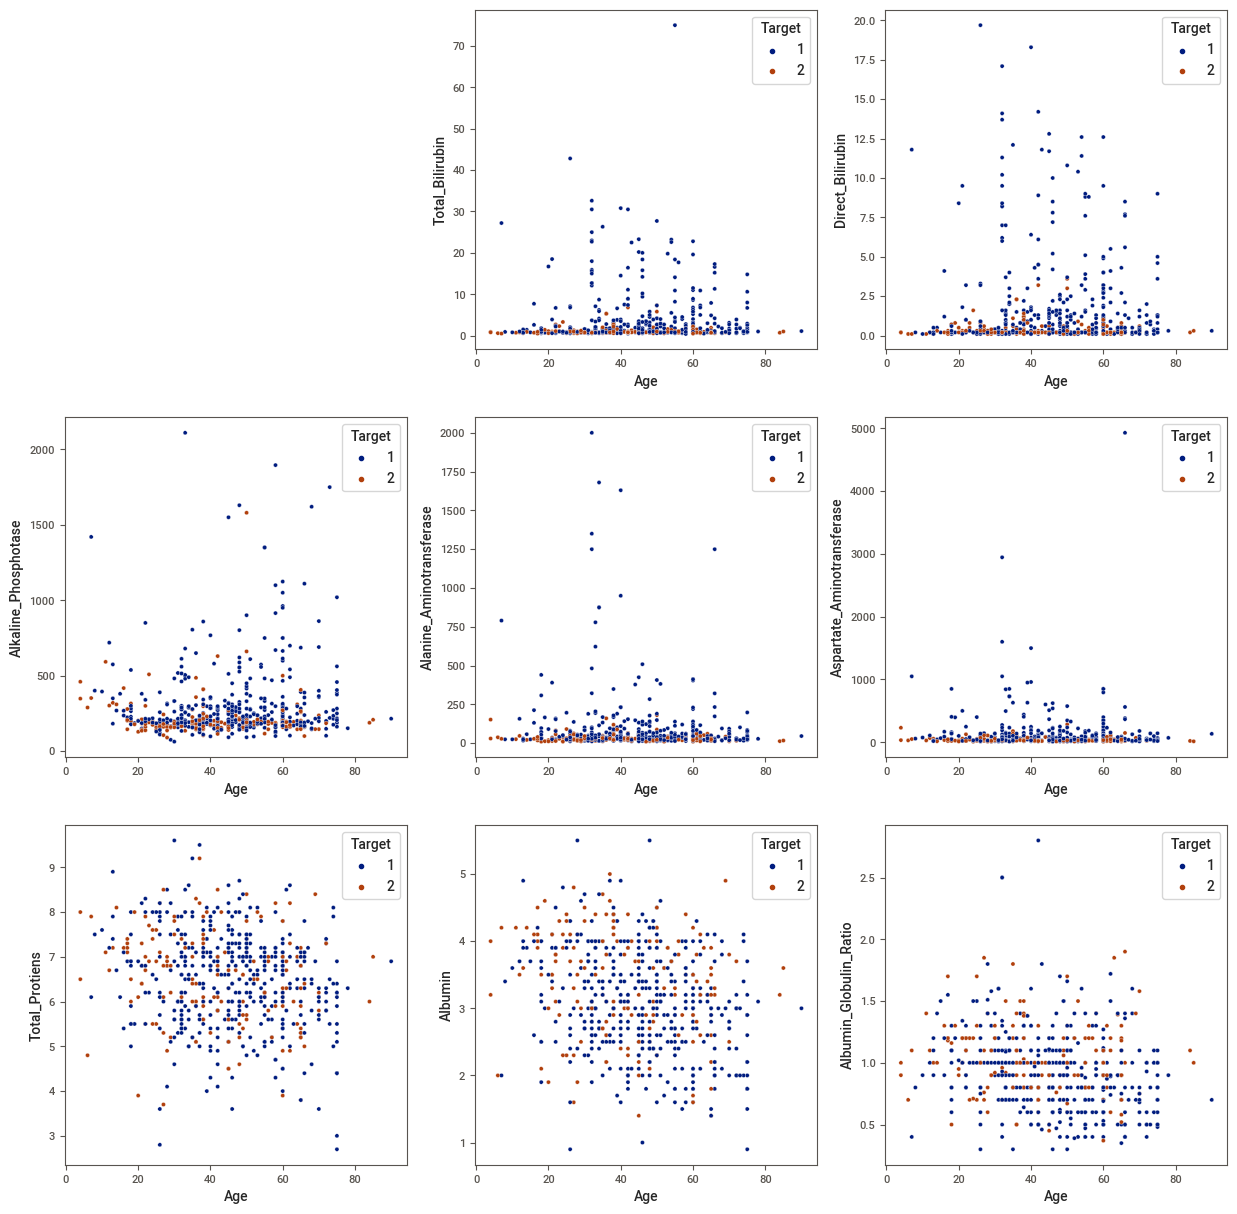

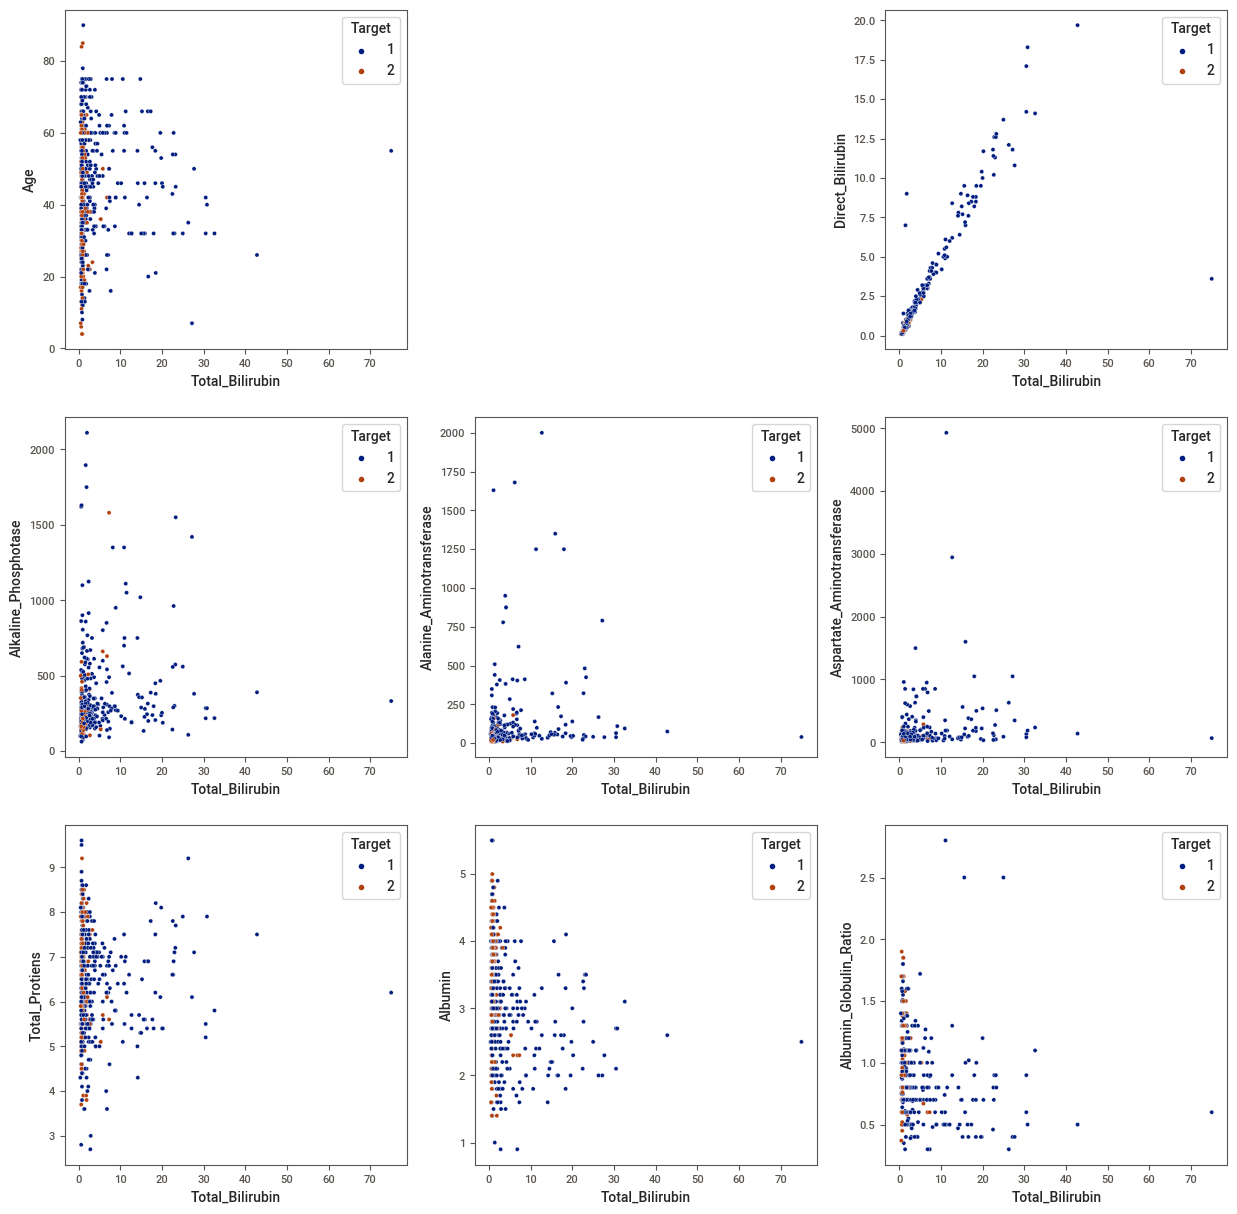

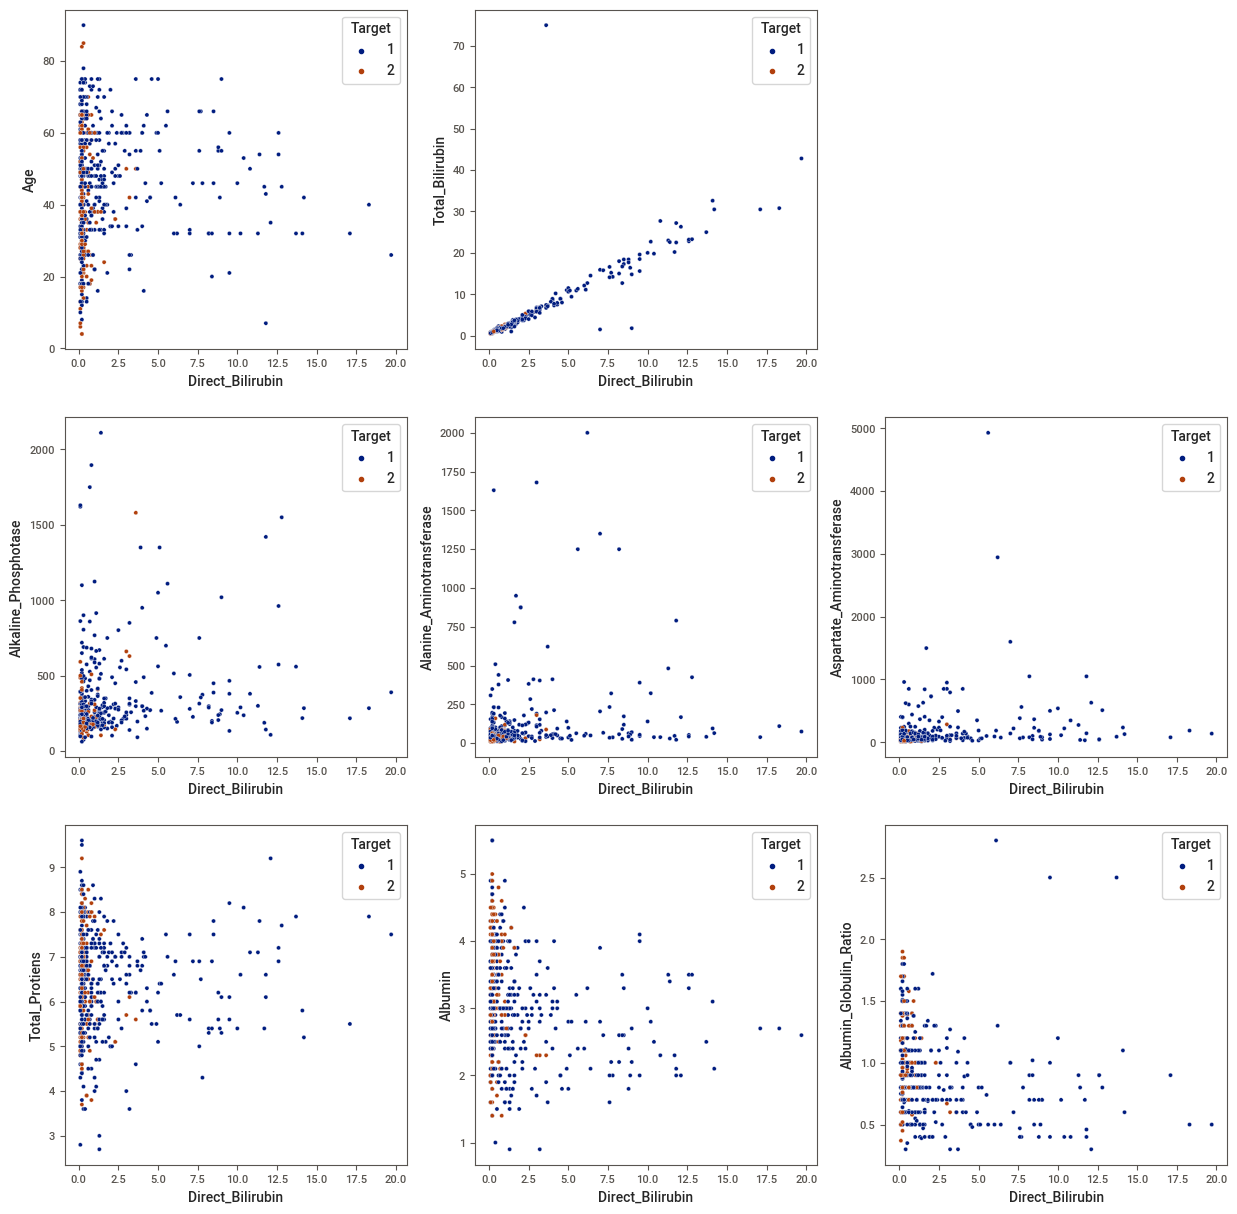

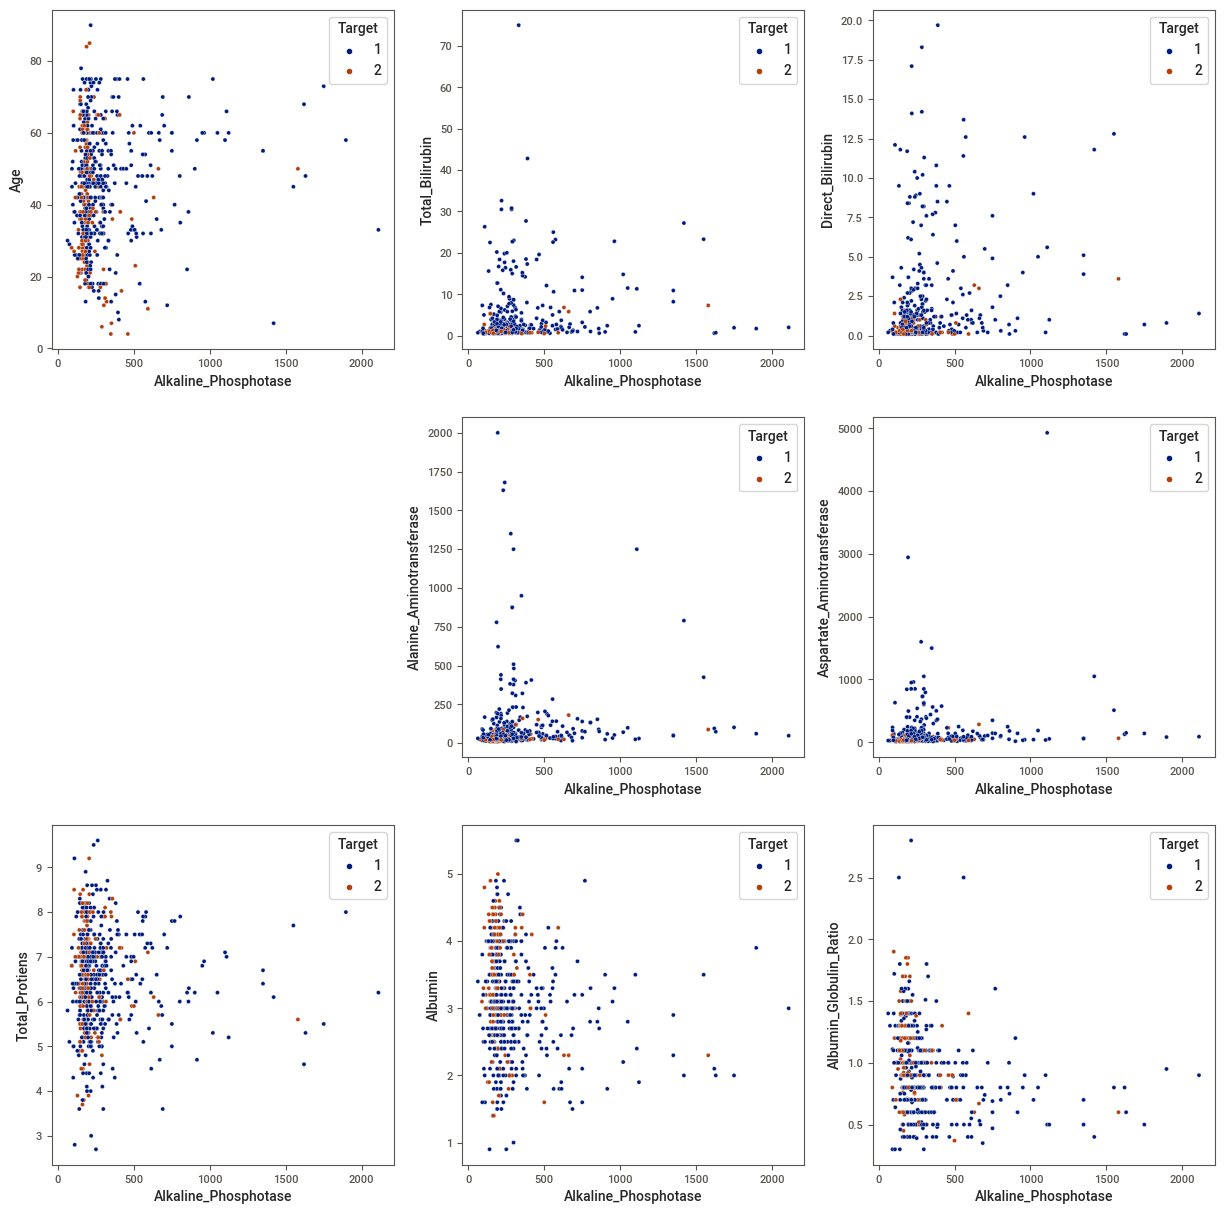

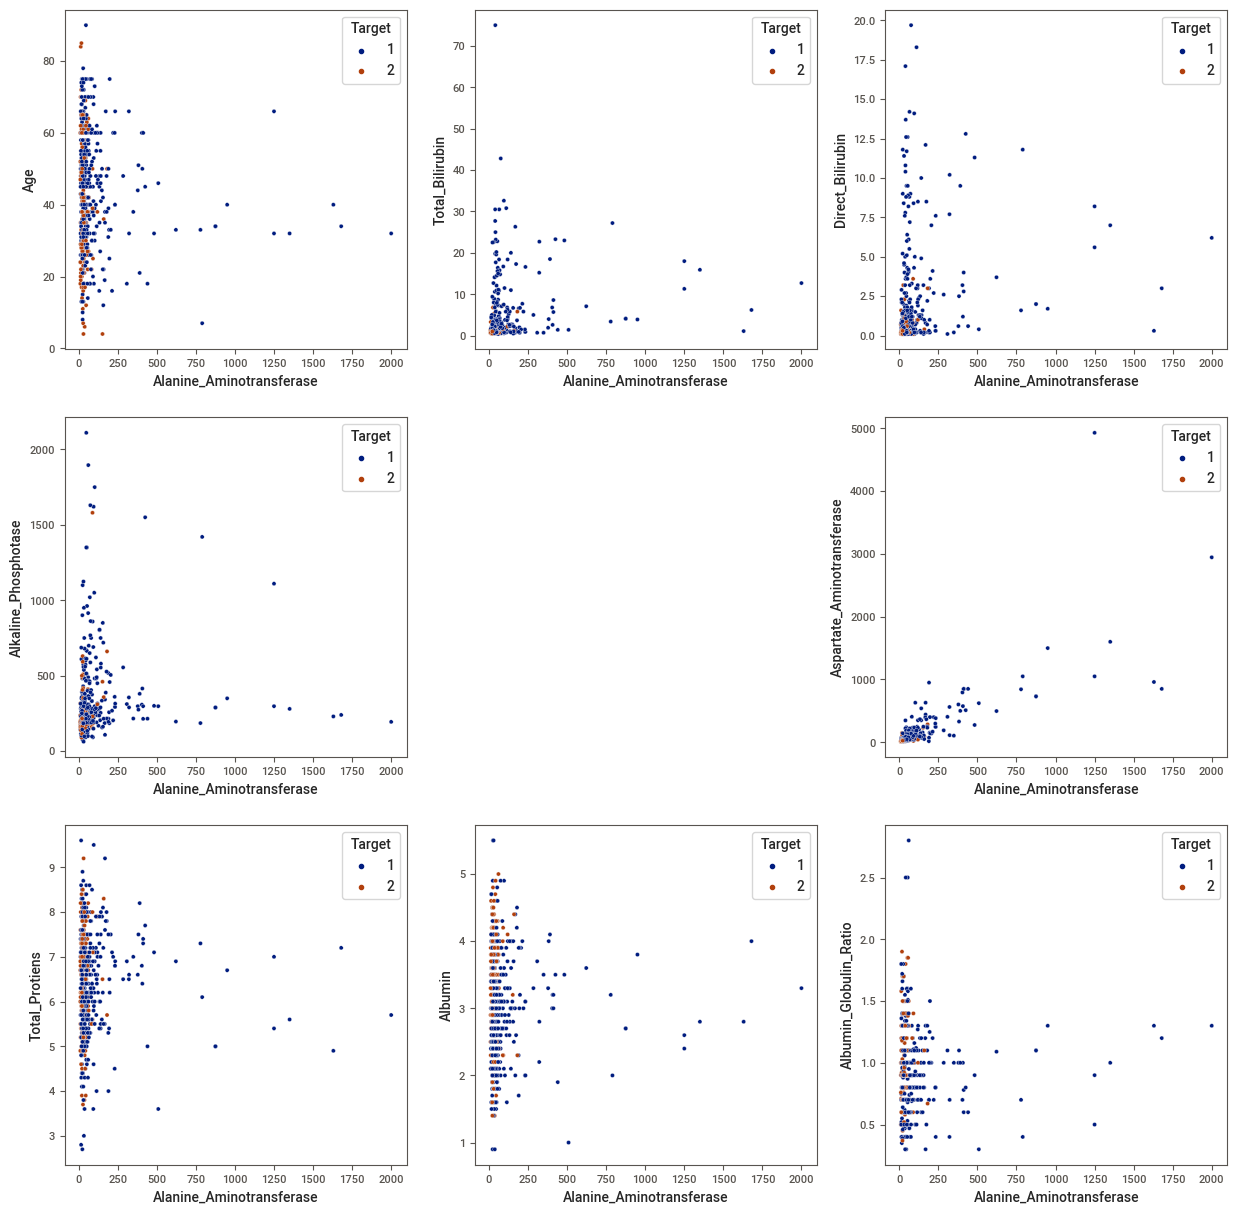

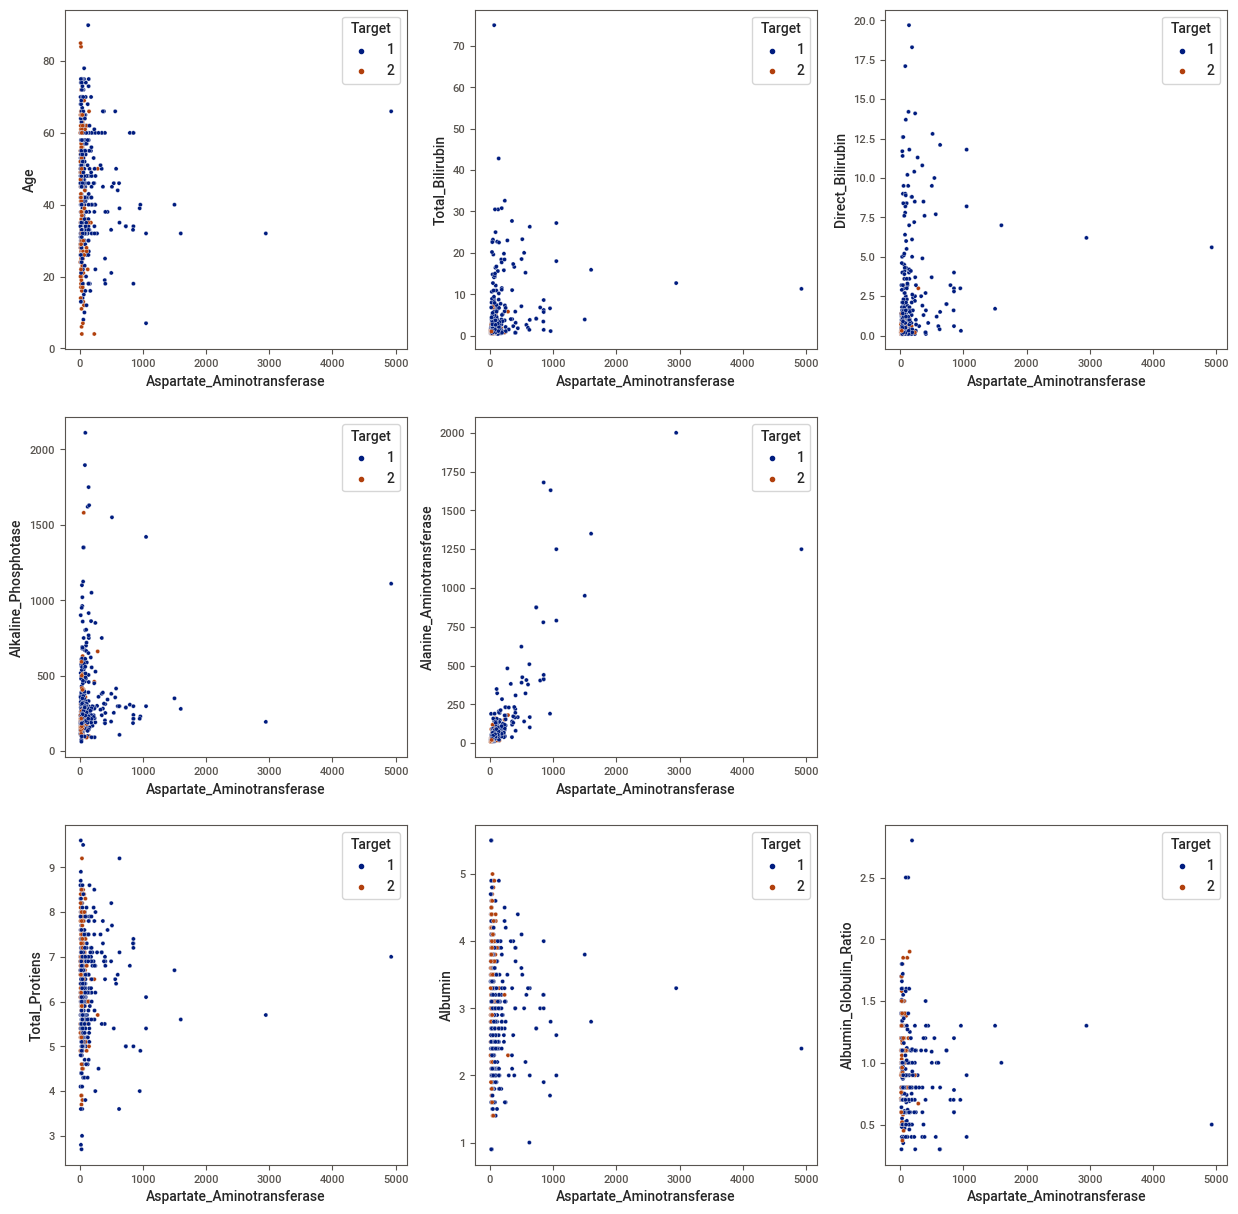

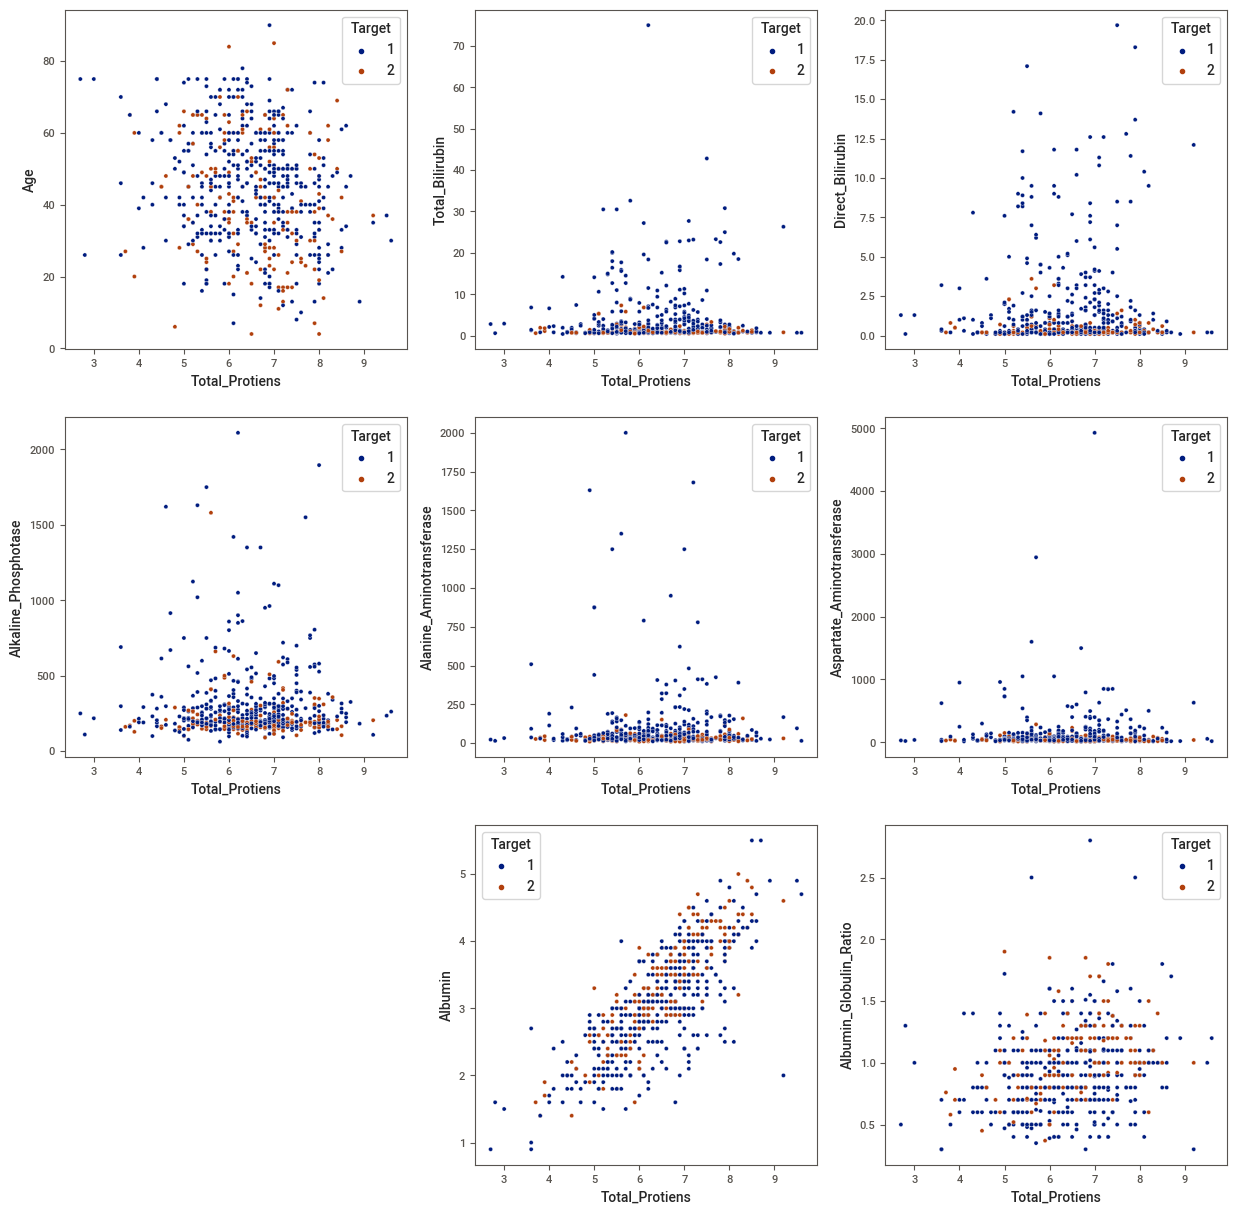

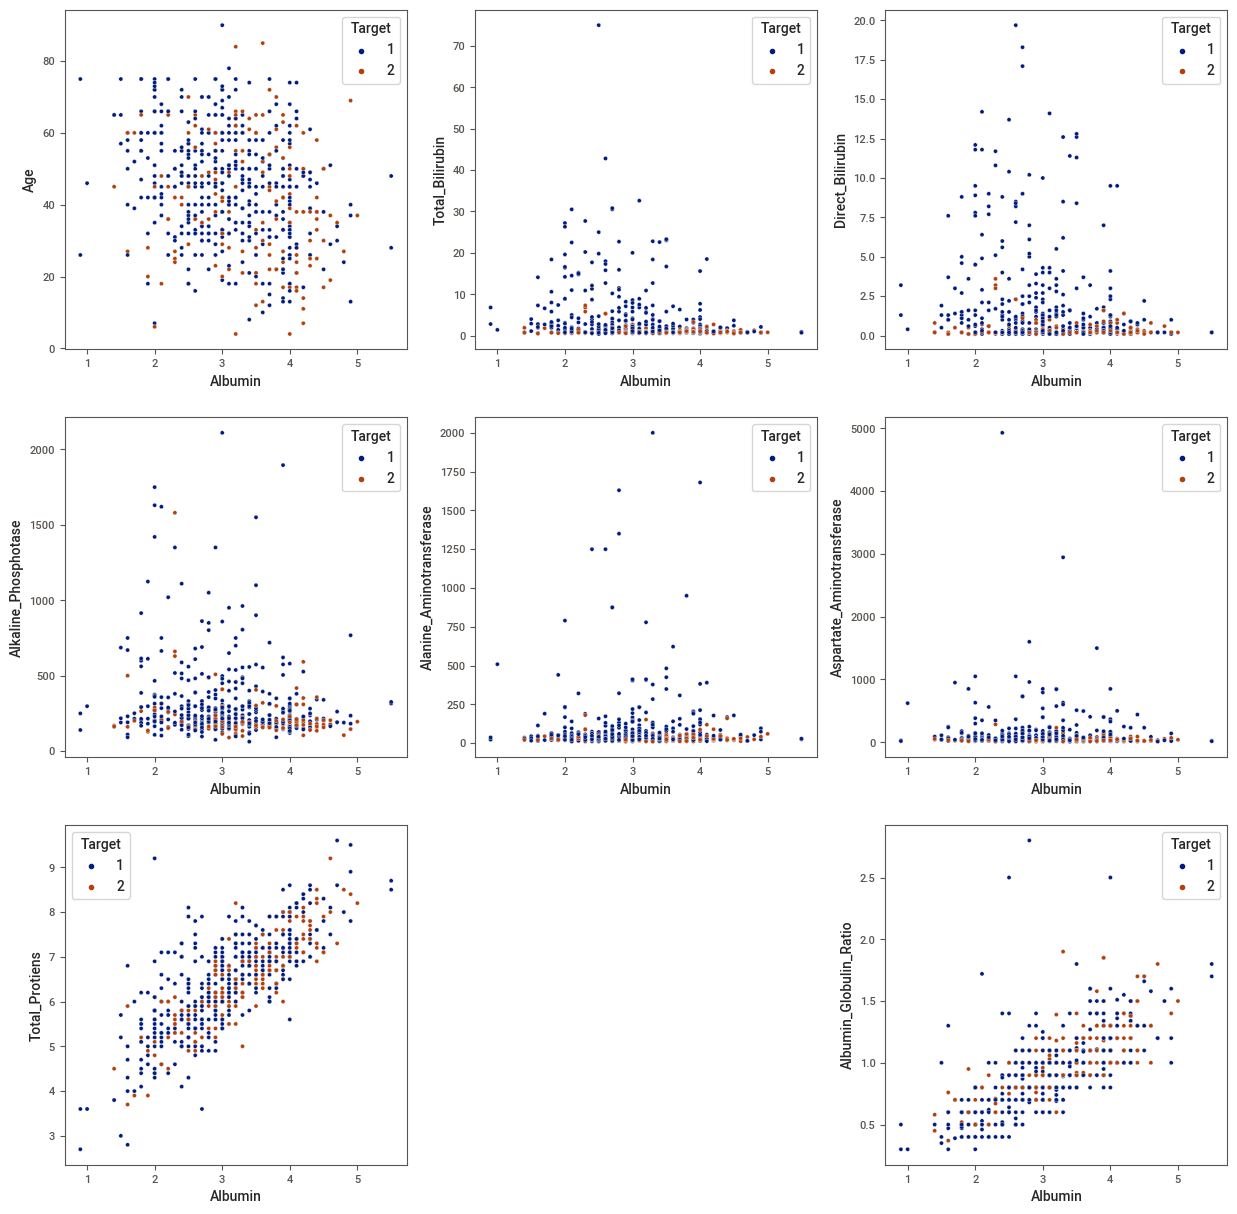

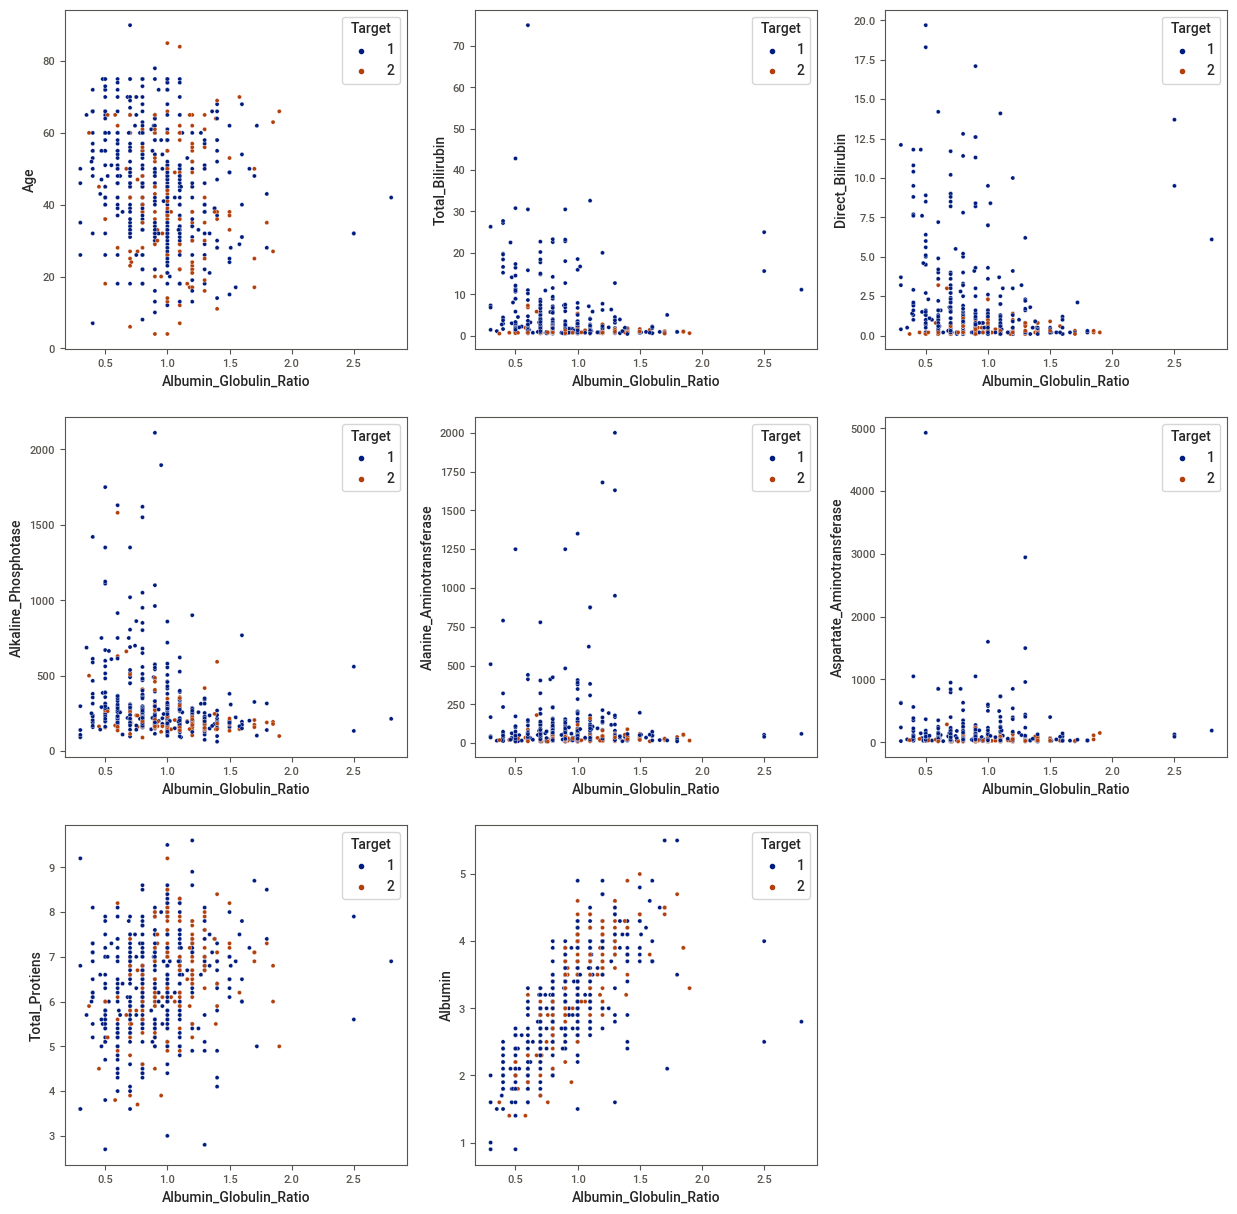

In [142]:
plt_num1 = 1

for column1 in liver_data_num:
    if plt_num1 <= 9:
        plt_num2 = 1
        plt.figure(figsize=(15,15))
        for column2 in liver_data_num:
            if plt_num2 <= 9:
                if column2 != column1:
                    plt.subplot(3,3,plt_num2)
                    sns.scatterplot(x=column1, y=column2, data=liver_data, hue="Target", palette="dark")
            plt_num2+=1
    plt.show()
    plt_num1+=1       

##### 3.2.2 Inference
1) In general, an increase in vital features like Direct_Bilirubin, Aspartate_Aminotransferase, Alanine_Aminotransferase etc., 
   beyond their normal range results in liver disease
2) With respect to "Age", whether a patient is young or old, an increase in the value of other features beyond their normal 
   range mostly(~90%) results in liver disease with exception being Total_Proteins, Albumin and Albumin_Globulin_Ratio as the 
   likelihood of disease is random
3) Any feature plotted against (especially)Bilirubin(Total or Direct) shows a likelihood of liver disease when there is an 
   increase in their value beyond the normal range
4) An increase in (especially)Bilirubin plotted against other features shows a ~90% of likelihood of liver disease
5) An increase in Total_Proteins and Albumin vs Albumin_Globulin_Ratio shows random/mixed values of patients containing liver 
   diesease or not

#### 3.2.3 Multivariate analysis

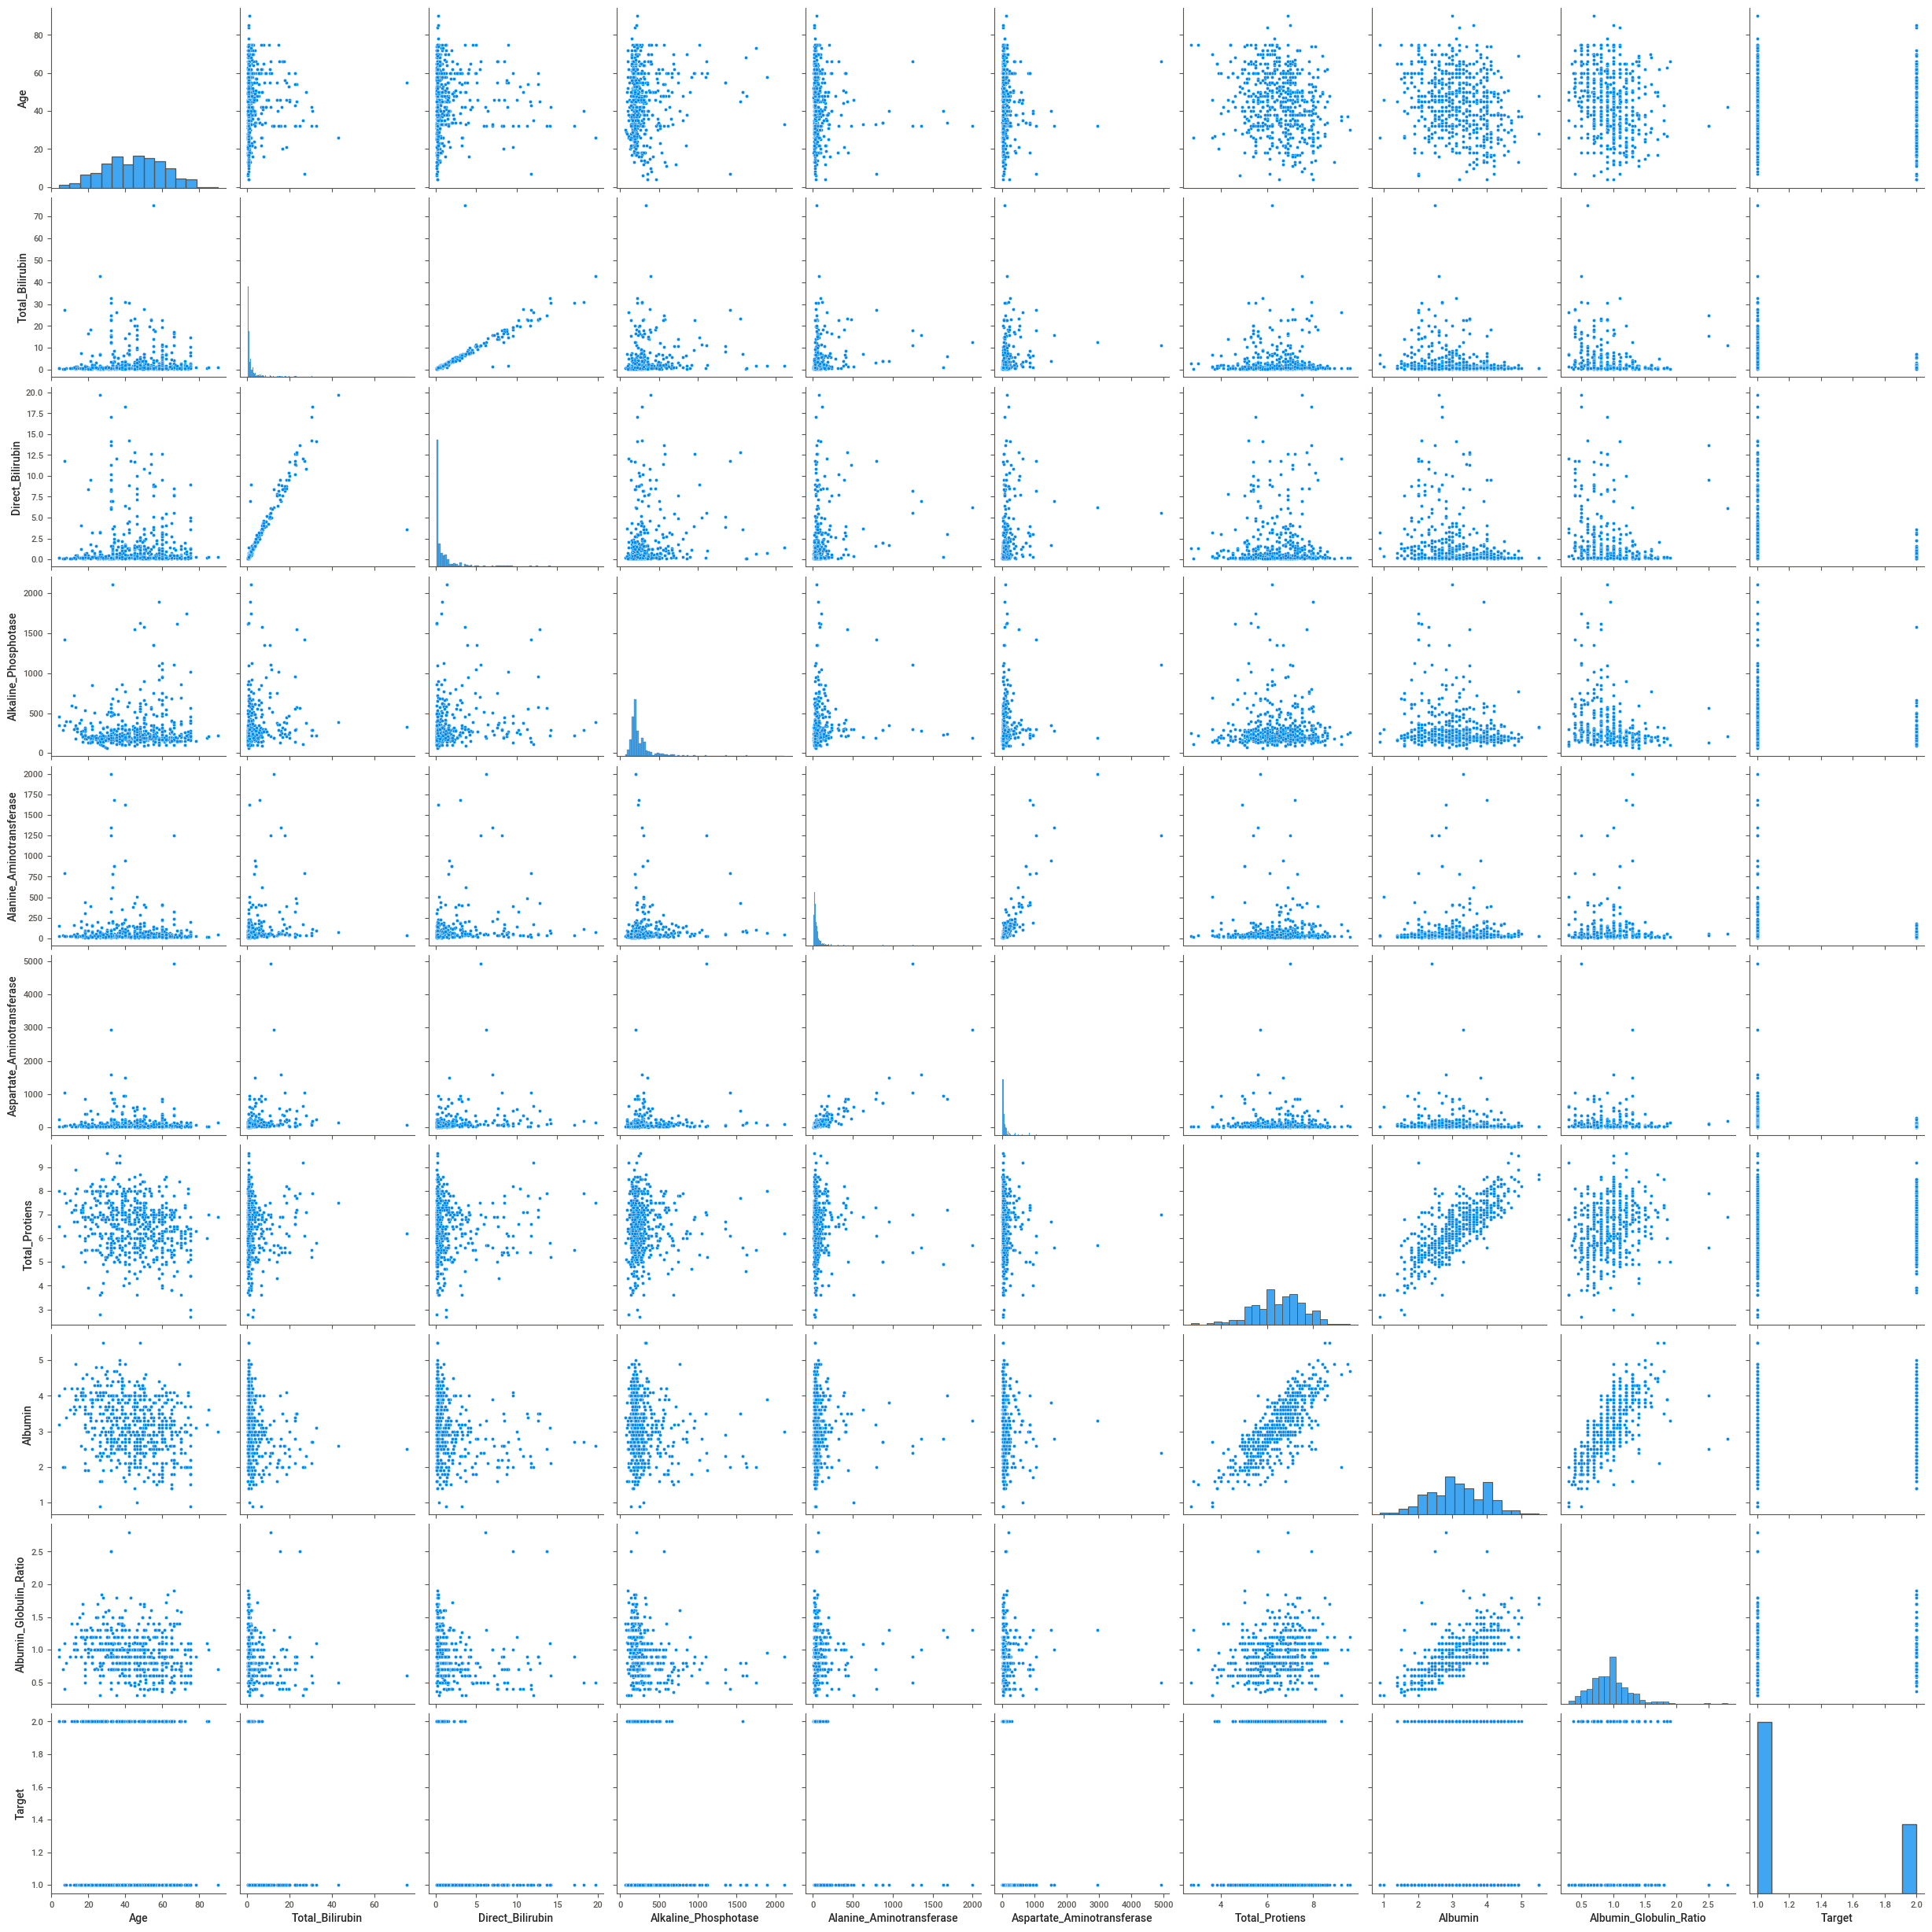

In [143]:
sns.pairplot(liver_data, palette="bright")
plt.show()

##### 3.2.3 Inference
1) Same as the inference in 3.2.2

## 4) Data pre-processing

### 4.1 Remove the duplicates(based on 3.1.4 Inference)

In [144]:
liver_data.drop_duplicates(inplace=True)

In [145]:
# Check if duplicate values exist still
liver_data.duplicated().sum()

0

##### 4.1 Inference
1) Duplicate values are removed from the input data

### 4.2 Check for null values and correct them

In [183]:
liver_data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alanine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_Globulin_Ratio        4
Target                        0
dtype: int64

##### 4.2 Inference
1) There are 4 null values in the feature Albumin_Globulin_Ratio

In [192]:
# Replace null values with Median value
liver_data.loc[liver_data["Albumin_Globulin_Ratio"].isnull()==True, "Albumin_Globulin_Ratio"] = np.median(liver_data["Albumin_Globulin_Ratio"].dropna(axis=0))

In [193]:
liver_data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alanine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_Globulin_Ratio        0
Target                        0
dtype: int64

##### 4.2 Observation
1) Null values are replaced with median value

### 4.3 Convert the categorical value to numerical value

In [194]:
liver_data_gender = pd.get_dummies(liver_data['Gender'], prefix='Male', drop_first=True)

In [195]:
liver_data_gender

Male_Male
0            0
1            1
2            1
3            1
4            1
..         ...
578          1
579          1
580          1
581          1
582          1

[570 rows x 1 columns]

##### 4.3 Observation
1) Categorical values are converted to numerical values

In [196]:
# Updated dataframe
liver_data_upd = pd.concat([liver_data, liver_data_gender], axis=1).drop(['Gender'], axis=1)

In [197]:
liver_data_upd.rename(columns={'Male_Male':'Gender'}, inplace=True)

In [200]:
liver_data_upd

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65              0.7               0.1                   187   
1     62             10.9               5.5                   699   
2     62              7.3               4.1                   490   
3     58              1.0               0.4                   182   
4     72              3.9               2.0                   195   
..   ...              ...               ...                   ...   
578   60              0.5               0.1                   500   
579   40              0.6               0.1                    98   
580   52              0.8               0.2                   245   
581   31              1.3               0.5                   184   
582   38              1.0               0.3                   216   

     Alanine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                          16                          18             6.8   
1                          64                         100             7.5   
2                          60                          68             7.0   
3                          14                          20             6.8   
4                          27                          59             7.3   
..                        ...                         ...             ...   
578                        20                          34             5.9   
579                        35                          31             6.0   
580                        48                          49             6.4   
581                        29                          32             6.8   
582                        21                          24             7.3   

     Albumin  Albumin_Globulin_Ratio  Target  Gender  
0        3.3                    0.90       1       0  
1        3.2                    0.74       1       1  
2        3.3                    0.89       1       1  
3        3.4                    1.00       1       1  
4        2.4                    0.40       1       1  
..       ...                     ...     ...     ...  
578      1.6                    0.37       2       1  
579      3.2                    1.10       1       1  
580      3.2                    1.00       1       1  
581      3.4                    1.00       1       1  
582      4.4                    1.50       2       1  

[570 rows x 11 columns]

## 5) Dimensionality Reduction

##### Steps given below are followed in the order(as referenced in the link)

1) Scale the features
2) Feature selection and/or Feature extraction process
3) SMOTE

Link - https://machinelearningmastery.com/dimensionality-reduction-for-machine-learning/#:~:text=Dimensionality%20reduction%20is%20a%20data,before%20training%20a%20predictive%20model.

### 5.1) Split the dataset

In [201]:
# Split the dataset into x and y for scaling

In [202]:
X = liver_data_upd.drop(['Target'], axis=1)
y = liver_data_upd['Target']

### 5.2) Scale the features

In [203]:
# Input data follows normal distribution - use Standard Scaler

from sklearn.preprocessing import StandardScaler
std_scl = StandardScaler()

# Scale only the predictors
X_scl = std_scl.fit_transform(X)
X_scl = pd.DataFrame(X_scl, columns = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
                                       'Alanine_Aminotransferase', 'Aspartate_Aminotransferase',
                                       'Total_Protiens', 'Albumin', 'Albumin_Globulin_Ratio', 'Gender'])

In [204]:
liver_data_upd_scl = pd.concat([X_scl.reset_index(drop=True), y.reset_index(drop=True)], axis=1)
liver_data_upd_scl

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0    1.241741        -0.418647         -0.493702             -0.427421   
1    1.056874         1.210111          1.413923              1.661722   
2    1.056874         0.635255          0.919354              0.808927   
3    0.810385        -0.370743         -0.387723             -0.447823   
4    1.673096         0.092336          0.177500             -0.394778   
..        ...              ...               ...                   ...   
565  0.933630        -0.450584         -0.493702              0.849731   
566 -0.298813        -0.434616         -0.493702             -0.790573   
567  0.440653        -0.402679         -0.458375             -0.190760   
568 -0.853413        -0.322838         -0.352396             -0.439662   
569 -0.422058        -0.370743         -0.423049             -0.309091   

     Alanine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                   -0.351482                   -0.314428        0.279290   
1                   -0.086746                   -0.032278        0.923059   
2                   -0.108807                   -0.142385        0.463224   
3                   -0.362513                   -0.307546        0.279290   
4                   -0.290813                   -0.173353        0.739125   
..                        ...                         ...             ...   
565                 -0.329421                   -0.259374       -0.548414   
566                 -0.246691                   -0.269697       -0.456447   
567                 -0.174991                   -0.207761       -0.088579   
568                 -0.279783                   -0.266256        0.279290   
569                 -0.323905                   -0.293783        0.739125   

      Albumin  Albumin_Globulin_Ratio    Gender  Target  
0    0.189737               -0.150889 -1.752549       1  
1    0.064127               -0.653669  0.570597       1  
2    0.189737               -0.182313  0.570597       1  
3    0.315348                0.163348  0.570597       1  
4   -0.940754               -1.722078  0.570597       1  
..        ...                     ...       ...     ...  
565 -1.945636               -1.816349  0.570597       2  
566  0.064127                0.477586  0.570597       1  
567  0.064127                0.163348  0.570597       1  
568  0.315348                0.163348  0.570597       1  
569  1.571450                1.734537  0.570597       2  

[570 rows x 11 columns]

### 5.3) Feature Selection via Correlation

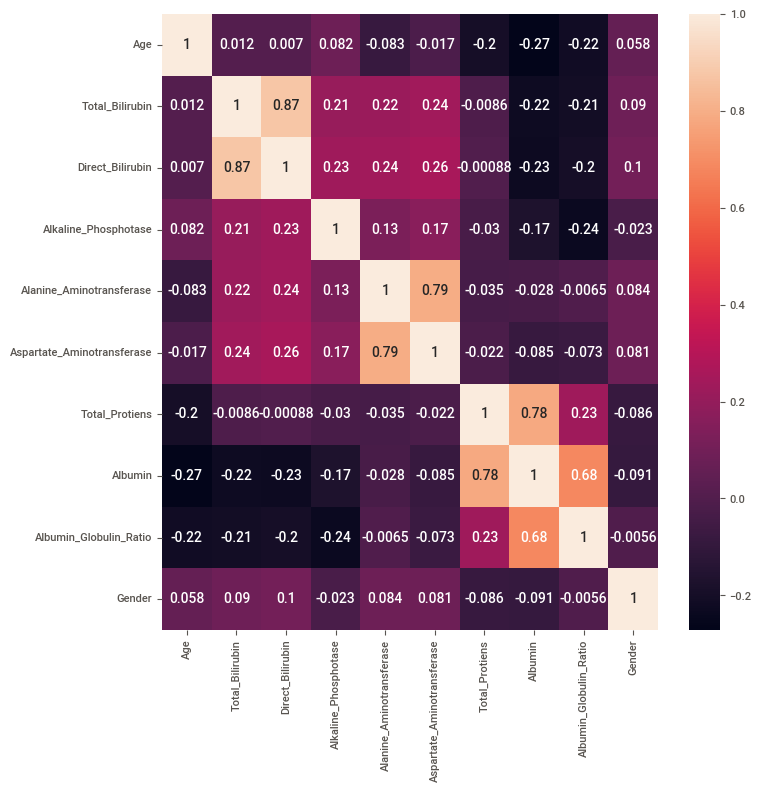

In [205]:
plt.figure(figsize=(8,8))
sns.heatmap(X_scl.corr(), annot=True)
plt.show()

##### 5.3 Inference
1) No 2 features have 90% o rmore correlation.  Hence, we cannot eliminate any feature from building the model

### 5.4 Feature Selection - Filter method

#### 5.4.1 Variance Threshold

In [206]:
# Threshold is set as 0.1; features below this threshold level can be removed

from sklearn.model_selection import train_test_split as tts
from sklearn.feature_selection import VarianceThreshold as vt

X_train_vt, X_test_vt, y_train_vt, y_test_vt = tts(X_scl, y, test_size=0.2, random_state=9)
var_thr = vt(threshold=0.1)
var_thr.fit(X_train_vt)
print(var_thr.get_support())
print(sum(var_thr.get_support()))

[ True  True  True  True  True  True  True  True  True  True]
10


##### 5.4.1 Inference
1) No feature has variance below the threshold.  We need not exclude any feature

#### 5.4.2 Correlation coefficient

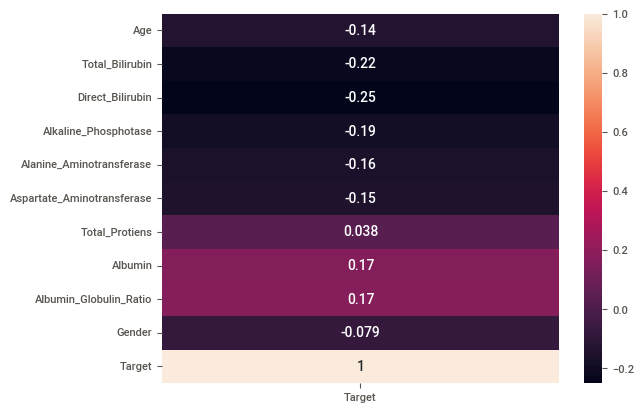

In [207]:
sns.heatmap(liver_data_upd_scl.corr()[["Target"]], annot=True)
plt.show()

##### 5.4.2 Inference
1) No feature has significant correlation of 90% or above.  We need not exclude any feature

#### 5.4.3 Duplicated features

In [208]:
from fast_ml.utilities import display_all
from fast_ml.feature_selection import get_duplicate_features

get_duplicate_features(liver_data_upd_scl)

Empty DataFrame
Columns: [Desc, feature1, feature2]
Index: []

##### 5.4.3 Inference
1) No duplicate features available.  We need not exclude any feature

#### 5.4.4 Information gain

In [209]:
liver_data_dep_list = []

from sklearn.feature_selection import mutual_info_classif

for rand_stat in range(0,101):
    liver_data_dep = mutual_info_classif(X_scl, y, random_state=rand_stat)
    liver_data_dep_df = pd.DataFrame(liver_data_dep, columns=['Dependence'], index=X_scl.columns)
    liver_data_dep_df_col = liver_data_dep_df[liver_data_dep_df['Dependence'] == 0]
    liver_data_dep_list.append([rand_stat, liver_data_dep_df_col.index])

liver_data_dep_list

[[0, Index(['Total_Protiens'], dtype='object')],
 [1, Index(['Total_Protiens', 'Albumin', 'Gender'], dtype='object')],
 [2, Index(['Total_Protiens', 'Gender'], dtype='object')],
 [3, Index(['Total_Protiens', 'Gender'], dtype='object')],
 [4, Index(['Total_Protiens'], dtype='object')],
 [5,
  Index(['Total_Protiens', 'Albumin_Globulin_Ratio', 'Gender'], dtype='object')],
 [6, Index(['Total_Protiens'], dtype='object')],
 [7, Index(['Total_Protiens'], dtype='object')],
 [8, Index(['Total_Protiens', 'Gender'], dtype='object')],
 [9, Index(['Gender'], dtype='object')],
 [10, Index(['Total_Protiens', 'Gender'], dtype='object')],
 [11, Index(['Total_Protiens'], dtype='object')],
 [12, Index(['Total_Protiens'], dtype='object')],
 [13, Index(['Total_Protiens', 'Albumin'], dtype='object')],
 [14, Index(['Total_Protiens', 'Gender'], dtype='object')],
 [15, Index(['Total_Protiens'], dtype='object')],
 [16, Index(['Total_Protiens', 'Albumin', 'Gender'], dtype='object')],
 [17, Index(['Total_Protien

##### 5.4.4 Inference
1) Here Gender, Total Proteins and Albumin are identified as variables with mutual dependency.  However,
2) We cannot eliminate Total Proteins and Albumin as they are key features.  We can eliminate Gender alone

#### 5.4.5 Chi2

In [210]:
from sklearn.feature_selection import SelectKBest, chi2

chi2_feat = SelectKBest(chi2, k=8)

best_feat = chi2_feat.fit_transform(X, y) # X should be non-negative.  So, give actual X & y
best_feat_ind = chi2_feat.get_support(indices=True)
print(X.columns[[best_feat_ind]])

[['Age' 'Total_Bilirubin' 'Direct_Bilirubin' 'Alkaline_Phosphotase'
  'Alanine_Aminotransferase' 'Aspartate_Aminotransferase' 'Albumin'
  'Albumin_Globulin_Ratio']]


##### 5.4.5 Inference
1) Gender can be removed

### 5.5) Feature Selection - Embedded method

#### 5.5.1 Tree based(Feature importance) method

In [211]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [212]:
X_train_tb, X_test_tb, y_train_tb, y_test_tb = tts(X_scl, y, test_size=0.2, random_state=9)
tb_model = SelectFromModel(RandomForestClassifier(n_estimators=20, random_state=9))
tb_model.fit(X_train_tb, y_train_tb)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=20,
                                                 random_state=9))

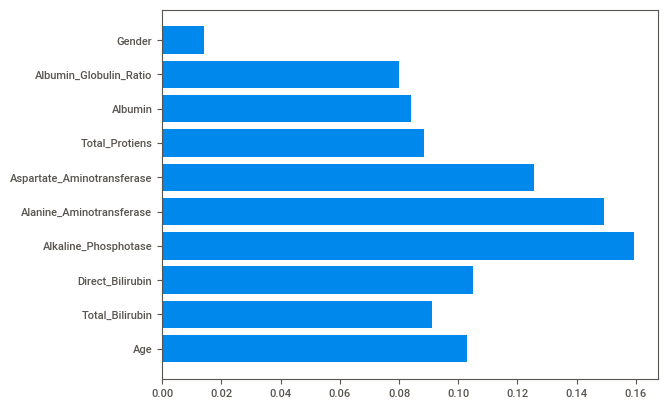

In [213]:
plt.barh(X_scl.columns, tb_model.estimator_.feature_importances_)
plt.show()

##### 5.5.1 Inference
1) Gender can be removed

##### Consolidated Inference
1) Based on all of the above feature selection methodologies, we could see Gender can be removed
2) We can proceed to build the model with and without Gender and identify the best model

In [214]:
# Create a dataframe without the feature "Gender"

X_scl_wog = X_scl.drop("Gender", axis=1)

### 5.6) Test-Train split

In [215]:
# With all features
X_train, X_test, y_train, y_test = tts(X_scl, y, test_size=0.2, random_state=9)

# Without the feature "Gender"
X_train_wog, X_test_wog, y_train_wog, y_test_wog = tts(X_scl_wog, y, test_size=0.2, random_state=9)

### 5.7) Apply SMOTE to balance the dataset(based on 3.1.3 Inference)

In [216]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [217]:
# With all features
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Without the feature "Gender"
X_train_wog_smote, y_train_wog_smote = smote.fit_resample(X_train_wog, y_train_wog)

In [218]:
print(y_train_smote.value_counts())
print(y_train_wog_smote.value_counts())

2    317
1    317
Name: Target, dtype: int64
2    317
1    317
Name: Target, dtype: int64


## 6) Model selection and creation

##### Given below are the variables used to build the model
1) ALL features - consider X_scl and y
2) Without Gender - consider X_scl_wog and y

Note - In general, any variable with _wog denotes that is without the feature "Gender"

#### 6.1) Logistic Regression

In [219]:
from sklearn.linear_model import LogisticRegression

# With all features
log_reg = LogisticRegression()
log_reg.fit(X_train_smote, y_train_smote)
y_pred_lor = log_reg.predict(X_test)

# Without the feature Gender
log_reg_wog = LogisticRegression()
log_reg_wog.fit(X_train_wog_smote, y_train_wog_smote)
y_pred_wog_lor = log_reg_wog.predict(X_test_wog)

In [220]:
# Calculate the classification metrics(These are calculated for all of the ML models)
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

In [221]:
# With all features
cla_rep_lor = classification_report(y_test, y_pred_lor)
acc_sco_lor = accuracy_score(y_test, y_pred_lor)
f1_sco_lor = f1_score(y_test, y_pred_lor)
pre_sco_lor = precision_score(y_test, y_pred_lor)
rec_sco_lor = recall_score(y_test, y_pred_lor)
print(cla_rep_lor)

# Without the feature "Gender"
cla_rep_wog_lor = classification_report(y_test_wog, y_pred_wog_lor)
acc_sco_wog_lor = accuracy_score(y_test_wog, y_pred_wog_lor)
f1_sco_wog_lor = f1_score(y_test_wog, y_pred_wog_lor)
pre_sco_wog_lor = precision_score(y_test_wog, y_pred_wog_lor)
rec_sco_wog_lor = recall_score(y_test_wog, y_pred_wog_lor)
print(cla_rep_wog_lor)

              precision    recall  f1-score   support

           1       0.92      0.61      0.73        89
           2       0.36      0.80      0.50        25

    accuracy                           0.65       114
   macro avg       0.64      0.70      0.61       114
weighted avg       0.79      0.65      0.68       114

              precision    recall  f1-score   support

           1       0.94      0.65      0.77        89
           2       0.40      0.84      0.55        25

    accuracy                           0.69       114
   macro avg       0.67      0.75      0.66       114
weighted avg       0.82      0.69      0.72       114



#### 6.2) KNN

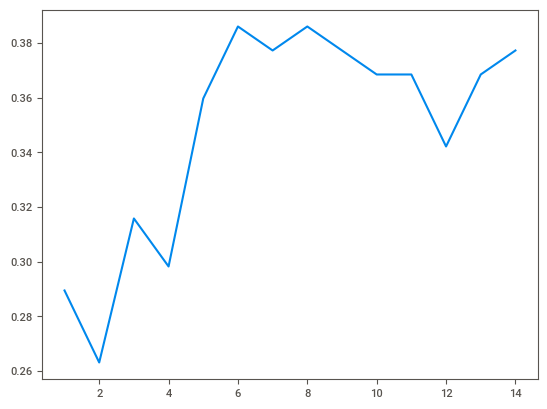

In [222]:
from sklearn.neighbors import KNeighborsClassifier

# Calculate optimum neighbor(With all features)
err_rate = []
for neighbor in range(1,15):
    knn_cla = KNeighborsClassifier(n_neighbors = neighbor)
    knn_cla.fit(X_train_smote, y_train_smote)
    y_pred_knn_init = knn_cla.predict(X_test)
    err_rate.append(np.mean(y_pred_knn_init != y_test))

plt.plot(range(1,15), err_rate)
plt.show()

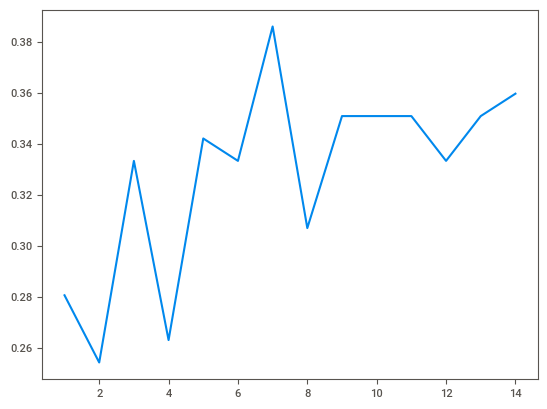

In [223]:
# Calculate optimum neighbor(Without the feature "Gender")
err_rate_wog = []
for neighbor in range(1,15):
    knn_cla_wog = KNeighborsClassifier(n_neighbors = neighbor)
    knn_cla_wog.fit(X_train_wog_smote, y_train_wog_smote)
    y_pred_knn_wog_init = knn_cla_wog.predict(X_test_wog)
    err_rate_wog.append(np.mean(y_pred_knn_wog_init != y_test_wog))

plt.plot(range(1,15), err_rate_wog)
plt.show()

##### 6.2 Inference
1) Elbow point not visible in the KNN method.  Probably due to less data; hence skipping this method

#### 6.3) SVM

In [224]:
from sklearn.svm import SVC

# Calculate the hyper parameters
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 2],
              'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
              'random_state': list(range(0,100))}

svc_hpt = SVC()
grid = GridSearchCV(svc_hpt, param_grid, refit=True, verbose=1, scoring='f1', cv=5)

grid.fit(X,y)

Fitting 5 folds for each of 2500 candidates, totalling 12500 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 2],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13, 14, 15, 16, 17, 18, 19, 20,
                                          21, 22, 23, 24, 25, 26, 27, 28, 29, ...]},
             scoring='f1', verbose=1)

In [225]:
# Best hyper parameters for SVM
print(grid.best_estimator_)

SVC(C=1, gamma=0.0001, random_state=0)


In [226]:
# With all features
svm_cla = SVC(C=1, gamma=0.0001, random_state=0)
svm_cla.fit(X_train_smote, y_train_smote)

y_pred_svm = svm_cla.predict(X_test)

cla_rep_svm = classification_report(y_test, y_pred_svm)
acc_sco_svm = accuracy_score(y_test, y_pred_svm)
f1_sco_svm = f1_score(y_test, y_pred_svm)
pre_sco_svm = precision_score(y_test, y_pred_svm)
rec_sco_svm = recall_score(y_test, y_pred_svm)
print(cla_rep_svm)

# Without the feature "Gender"
svm_cla_wog = SVC(C=1, gamma=0.0001, random_state=0)
svm_cla_wog.fit(X_train_wog_smote, y_train_wog_smote)

y_pred_wog_svm = svm_cla_wog.predict(X_test_wog)

cla_rep_wog_svm = classification_report(y_test_wog, y_pred_wog_svm)
acc_sco_wog_svm = accuracy_score(y_test_wog, y_pred_wog_svm)
f1_sco_wog_svm = f1_score(y_test_wog, y_pred_wog_svm)
pre_sco_wog_svm = precision_score(y_test_wog, y_pred_wog_svm)
rec_sco_wog_svm = recall_score(y_test_wog, y_pred_wog_svm)
print(cla_rep_wog_svm)

              precision    recall  f1-score   support

           1       1.00      0.16      0.27        89
           2       0.25      1.00      0.40        25

    accuracy                           0.34       114
   macro avg       0.62      0.58      0.34       114
weighted avg       0.84      0.34      0.30       114

              precision    recall  f1-score   support

           1       1.00      0.13      0.24        89
           2       0.25      1.00      0.39        25

    accuracy                           0.32       114
   macro avg       0.62      0.57      0.32       114
weighted avg       0.83      0.32      0.27       114



#### 6.4) Decision Tree

In [227]:
from sklearn.tree import DecisionTreeClassifier

# With all features
param_grid_dec_tree = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": (list(range(1,20))),
    "min_samples_split": [2,3,4,5],
    "min_samples_leaf": (list(range(1,20)))
}

dec_tree_gscv = DecisionTreeClassifier()

dec_tree_cv = GridSearchCV(dec_tree_gscv, param_grid_dec_tree, scoring='f1',
                        refit=True, verbose=1, cv=3, n_jobs=-1)

dec_tree_cv.fit(X_train_smote, y_train_smote)

print(dec_tree_cv.best_params_)
print(dec_tree_cv.best_score_)

Fitting 3 folds for each of 5776 candidates, totalling 17328 fits
{'criterion': 'gini', 'max_depth': 16, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
0.7399310191366267


In [228]:
# With all features
dec_tree_best = DecisionTreeClassifier(criterion='gini', max_depth=16, min_samples_leaf=2,
                                       min_samples_split=2, splitter='random')
dec_tree_best.fit(X_train_smote, y_train_smote)

y_pred_dec_tree = dec_tree_best.predict(X_test)

cla_rep_dec_tree = classification_report(y_test, y_pred_dec_tree)
acc_sco_dec_tree = accuracy_score(y_test, y_pred_dec_tree)
f1_sco_dec_tree = f1_score(y_test, y_pred_dec_tree)
pre_sco_dec_tree = precision_score(y_test, y_pred_dec_tree)
rec_sco_dec_tree = recall_score(y_test, y_pred_dec_tree)
print(cla_rep_dec_tree)

              precision    recall  f1-score   support

           1       0.86      0.84      0.85        89
           2       0.48      0.52      0.50        25

    accuracy                           0.77       114
   macro avg       0.67      0.68      0.68       114
weighted avg       0.78      0.77      0.78       114



In [229]:
# Without Gender

param_grid_dec_tree_wog = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": (list(range(1,20))),
    "min_samples_split": [2,3,4,5],
    "min_samples_leaf": (list(range(1,20)))
}

dec_tree_wog_gscv = DecisionTreeClassifier()

dec_tree_wog_cv = GridSearchCV(dec_tree_wog_gscv, param_grid_dec_tree_wog, scoring='f1',
                        refit=True, verbose=1, cv=3, n_jobs=-1)

dec_tree_wog_cv.fit(X_train_wog_smote, y_train_wog_smote)

print(dec_tree_wog_cv.best_params_)
print(dec_tree_wog_cv.best_score_)

Fitting 3 folds for each of 5776 candidates, totalling 17328 fits
{'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}
0.7463900565106812


In [230]:
# Without the feature "Gender"
dec_tree_wog_best = DecisionTreeClassifier(criterion='entropy', max_depth=18, min_samples_leaf=1,
                                       min_samples_split=3, splitter='best')
dec_tree_wog_best.fit(X_train_wog_smote, y_train_wog_smote)

y_pred_wog_dec_tree = dec_tree_wog_best.predict(X_test_wog)

cla_rep_wog_dec_tree = classification_report(y_test_wog, y_pred_wog_dec_tree)
acc_sco_wog_dec_tree = accuracy_score(y_test_wog, y_pred_wog_dec_tree)
f1_sco_wog_dec_tree = f1_score(y_test_wog, y_pred_wog_dec_tree)
pre_sco_wog_dec_tree = precision_score(y_test_wog, y_pred_wog_dec_tree)
rec_sco_wog_dec_tree = recall_score(y_test_wog, y_pred_wog_dec_tree)
print(cla_rep_wog_dec_tree)

              precision    recall  f1-score   support

           1       0.79      0.74      0.76        89
           2       0.23      0.28      0.25        25

    accuracy                           0.64       114
   macro avg       0.51      0.51      0.51       114
weighted avg       0.66      0.64      0.65       114



#### 6.5) Random Forest

In [231]:
from sklearn.model_selection import RandomizedSearchCV

# Variables and values declaration for hyper parameter identification
n_estimators = [int(x) for x in np.linspace(200,2000,10)]
max_features = ["sqrt", "log2", None]
max_depth = [int(y) for y in np.linspace(start=10, stop=110, num=10)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [True, False]

rand_frst_parm_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'bootstrap' : bootstrap
}

In [248]:
from sklearn.ensemble import RandomForestClassifier

# With all features
rand_frst_rfcv = RandomForestClassifier(random_state=9)
rand_frst_cv = RandomizedSearchCV(estimator=rand_frst_rfcv, scoring='f1', param_distributions=rand_frst_parm_grid,
                                 n_iter=100, n_jobs=-1, verbose=3, cv=3, random_state=9)

rand_frst_cv.fit(X_train_smote, y_train_smote)
print("Best parameters for all features:", rand_frst_cv.best_params_)

# Without the feature "Gender"
rand_frst_rfcv_wog = RandomForestClassifier(random_state=9)
rand_frst_cv_wog = RandomizedSearchCV(estimator=rand_frst_rfcv_wog, scoring='f1', param_distributions=rand_frst_parm_grid,
                                 n_iter=100, n_jobs=-1, verbose=3, cv=3, random_state=9)

rand_frst_cv_wog.fit(X_train_wog_smote, y_train_wog_smote)
print("Best parameters for all features without Gender:", rand_frst_cv_wog.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters for all features: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 76, 'bootstrap': False}
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters for all features without Gender: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 21, 'bootstrap': True}


In [249]:
# With all features
rand_frst_bp = RandomForestClassifier(n_estimators=400, min_samples_split=5, min_samples_leaf=1,
                                      max_features="sqrt", max_depth=76, bootstrap=False, random_state=9)

rand_frst_bp.fit(X_train_smote, y_train_smote)

y_pred_ran_frst = rand_frst_bp.predict(X_test)

cla_rep_ran_frst = classification_report(y_test, y_pred_ran_frst)
acc_sco_ran_frst = accuracy_score(y_test, y_pred_ran_frst)
f1_sco_ran_frst = f1_score(y_test, y_pred_ran_frst)
pre_sco_ran_frst = precision_score(y_test, y_pred_ran_frst)
rec_sco_ran_frst = recall_score(y_test, y_pred_ran_frst)
print(cla_rep_ran_frst)

              precision    recall  f1-score   support

           1       0.82      0.84      0.83        89
           2       0.39      0.36      0.37        25

    accuracy                           0.74       114
   macro avg       0.61      0.60      0.60       114
weighted avg       0.73      0.74      0.73       114



In [250]:
# Without the feature "Gender"
rand_frst_bp_wog = RandomForestClassifier(n_estimators=200, min_samples_split=2, min_samples_leaf=1,
                                      max_features="sqrt", max_depth=21, bootstrap=True, random_state=9)

rand_frst_bp_wog.fit(X_train_wog_smote, y_train_wog_smote)

y_pred_wog_ran_frst = rand_frst_bp_wog.predict(X_test_wog)

cla_rep_wog_ran_frst = classification_report(y_test_wog, y_pred_wog_ran_frst)
acc_sco_wog_ran_frst = accuracy_score(y_test_wog, y_pred_wog_ran_frst)
f1_sco_wog_ran_frst = f1_score(y_test_wog, y_pred_wog_ran_frst)
pre_sco_wog_ran_frst = precision_score(y_test_wog, y_pred_wog_ran_frst)
rec_sco_wog_ran_frst = recall_score(y_test_wog, y_pred_wog_ran_frst)
print(cla_rep_wog_ran_frst)

              precision    recall  f1-score   support

           1       0.82      0.81      0.81        89
           2       0.35      0.36      0.35        25

    accuracy                           0.71       114
   macro avg       0.58      0.58      0.58       114
weighted avg       0.71      0.71      0.71       114



#### 6.6) Gradient Boosting

In [251]:
# Test-Train split with raw data

# With all features
X_train_gb, X_test_gb, y_train_gb, y_test_gb = tts(X, y, test_size=0.2, random_state=9)

# Without the feature "Gender"
X_train_wog_gb, X_test_wog_gb, y_train_wog_gb, y_test_wog_gb = tts(X.drop(["Gender"], axis=1),y,test_size=0.2, random_state=9)

In [252]:
# SMOTE the raw data

# With all features
X_train_gb_smote, y_train_gb_smote = smote.fit_resample(X_train_gb, y_train_gb)

# Without the feature "Gender"
X_train_wog_gb_smote, y_train_wog_gb_smote = smote.fit_resample(X_train_wog_gb, y_train_wog_gb)

In [253]:
from sklearn.ensemble import GradientBoostingClassifier

# With all features
gbc_smote = GradientBoostingClassifier()
gbc_smote.fit(X_train_gb_smote, y_train_gb_smote)

y_pred_gra_bost = gbc_smote.predict(X_test_gb)

cla_rep_gra_bost = classification_report(y_test_gb, y_pred_gra_bost)
acc_sco_gra_bost = accuracy_score(y_test_gb, y_pred_gra_bost)
f1_sco_gra_bost = f1_score(y_test_gb, y_pred_gra_bost)
pre_sco_gra_bost = precision_score(y_test_gb, y_pred_gra_bost)
rec_sco_gra_bost = recall_score(y_test_gb, y_pred_gra_bost)
print(cla_rep_gra_bost)

# Without the feature "Gender"
gbc_wog_smote = GradientBoostingClassifier()
gbc_wog_smote.fit(X_train_wog_gb_smote, y_train_wog_gb_smote)

y_pred_wog_gra_bost = gbc_wog_smote.predict(X_test_wog_gb)

cla_rep_wog_gra_bost = classification_report(y_test_gb, y_pred_wog_gra_bost)
acc_sco_wog_gra_bost = accuracy_score(y_test_gb, y_pred_wog_gra_bost)
f1_sco_wog_gra_bost = f1_score(y_test_gb, y_pred_wog_gra_bost)
pre_sco_wog_gra_bost = precision_score(y_test_gb, y_pred_wog_gra_bost)
rec_sco_wog_gra_bost = recall_score(y_test_gb, y_pred_wog_gra_bost)
print(cla_rep_wog_gra_bost)

              precision    recall  f1-score   support

           1       0.83      0.76      0.80        89
           2       0.34      0.44      0.39        25

    accuracy                           0.69       114
   macro avg       0.59      0.60      0.59       114
weighted avg       0.72      0.69      0.71       114

              precision    recall  f1-score   support

           1       0.84      0.78      0.81        89
           2       0.38      0.48      0.42        25

    accuracy                           0.71       114
   macro avg       0.61      0.63      0.61       114
weighted avg       0.74      0.71      0.72       114



#### 6.7) ANN

In [256]:
from sklearn.neural_network import MLPClassifier

In [257]:
# With all features

ann_smote = MLPClassifier(hidden_layer_sizes=(50,3),
                    learning_rate_init=0.1,
                    max_iter=100,
                    random_state=9)
ann_smote.fit(X_train_gb_smote, y_train_gb_smote)

y_pred_ann = ann_smote.predict(X_test_gb)

cla_rep_ann = classification_report(y_test_gb, y_pred_ann)
acc_sco_ann = accuracy_score(y_test_gb, y_pred_ann)
f1_sco_ann = f1_score(y_test_gb, y_pred_ann)
pre_sco_ann = precision_score(y_test_gb, y_pred_ann)
rec_sco_ann = recall_score(y_test_gb, y_pred_ann)

print("With all parameters:")
print(cla_rep_ann)

With all parameters:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        89
           2       0.22      1.00      0.36        25

    accuracy                           0.22       114
   macro avg       0.11      0.50      0.18       114
weighted avg       0.05      0.22      0.08       114



In [258]:
# Without the feature "Gender"

ann_wog_smote = MLPClassifier(hidden_layer_sizes=(50,3),
                    learning_rate_init=0.1,
                    max_iter=100,
                    random_state=9)
ann_wog_smote.fit(X_train_wog_gb_smote, y_train_wog_gb_smote)

y_pred_wog_ann = ann_wog_smote.predict(X_test_wog_gb)

cla_rep_wog_ann = classification_report(y_test_wog_gb, y_pred_wog_ann)
acc_sco_wog_ann = accuracy_score(y_test_wog_gb, y_pred_wog_ann)
f1_sco_wog_ann = f1_score(y_test_wog_gb, y_pred_wog_ann)
pre_sco_wog_ann = precision_score(y_test_wog_gb, y_pred_wog_ann)
rec_sco_wog_ann = recall_score(y_test_wog_gb, y_pred_wog_ann)

print("Without Gender:")
print(cla_rep_wog_ann)

Without Gender:
              precision    recall  f1-score   support

           1       0.78      1.00      0.88        89
           2       0.00      0.00      0.00        25

    accuracy                           0.78       114
   macro avg       0.39      0.50      0.44       114
weighted avg       0.61      0.78      0.68       114



## 7) Model comparison and evaluation

In [259]:
##### All models created above are compared and evaluated in this section

In [260]:
liver_data_metrics = {
    "Model" : ["Logistic Regression(All features)", "Logistic Regression(without Gender)",
               "SVM(All features)", "SVM(Without Gender)",
               "Decision Tree(All features)", "Decision Tree(Without Gender)",
               "Random Forest(All features)", "Random Forest(Without Gender)",
               "Gradient Boosting(All features)", "Gradient Boosting(Without Gender)",
               "ANN(Without Gender)"],
    "Accuracy" : [acc_sco_lor, acc_sco_wog_lor, acc_sco_svm, acc_sco_wog_svm,
                  acc_sco_dec_tree, acc_sco_wog_dec_tree, acc_sco_ran_frst, acc_sco_wog_ran_frst,
                  acc_sco_gra_bost, acc_sco_wog_gra_bost, acc_sco_wog_ann],
    "F1_score" : [f1_sco_lor, f1_sco_wog_lor, f1_sco_svm, f1_sco_wog_svm,
                  f1_sco_dec_tree, f1_sco_wog_dec_tree, f1_sco_ran_frst, f1_sco_wog_ran_frst,
                  f1_sco_gra_bost, f1_sco_wog_gra_bost, f1_sco_wog_ann],
    "Precision" : [pre_sco_lor, pre_sco_wog_lor, pre_sco_svm, pre_sco_wog_svm,
                  pre_sco_dec_tree, pre_sco_wog_dec_tree, pre_sco_ran_frst, pre_sco_wog_ran_frst,
                  pre_sco_gra_bost, pre_sco_wog_gra_bost, pre_sco_wog_ann],
    "Recall" : [rec_sco_lor, rec_sco_wog_lor, rec_sco_svm, rec_sco_wog_svm,
                  rec_sco_dec_tree, rec_sco_wog_dec_tree, rec_sco_ran_frst, rec_sco_wog_ran_frst,
                  rec_sco_gra_bost, rec_sco_wog_gra_bost, rec_sco_wog_ann]
}

In [261]:
liver_data_metrics_df = pd.DataFrame(liver_data_metrics)
liver_data_metrics_df.set_index("Model", inplace=True)
liver_data_metrics_df = (liver_data_metrics_df * 100).round(2)

In [262]:
# Tabular view of the performance metrics for quicker comparison and evaluation
print(liver_data_metrics_df)

                                     Accuracy  F1_score  Precision  Recall
Model                                                                     
Logistic Regression(All features)       64.91     72.97      91.53   60.67
Logistic Regression(without Gender)     69.30     76.82      93.55   65.17
SVM(All features)                       34.21     27.18     100.00   15.73
SVM(Without Gender)                     32.46     23.76     100.00   13.48
Decision Tree(All features)             77.19     85.23      86.21   84.27
Decision Tree(Without Gender)           64.04     76.30      78.57   74.16
Random Forest(All features)             73.68     83.33      82.42   84.27
Random Forest(Without Gender)           71.05     81.36      81.82   80.90
Gradient Boosting(All features)         69.30     79.53      82.93   76.40
Gradient Boosting(Without Gender)       71.05     80.70      84.15   77.53
ANN(Without Gender)                     78.07     87.68      78.07  100.00


## 8) Conclusion

Based on various models' performance metrics comparison and evaluation, we could list the 4 models given below as the best performers:
    
1) Decision Tree(All Features)
2) Random Forest(All features)
3) Random Forest(Without Gender)
4) ANN(Without Gender)

## 9) Challenges

1) The input dataset is very small
    1.1) with many outliers and few missing values
    1.2) and resulted in overfitting for few models(Ex: SVM and ANN)
    1.3) due to which finding the best random state was difficult

2) Since the input dataset has medical data, we could not correct the outliers.  Hence, used the given data as such